In [1]:
#Place the data file in the same directory of your notebook

elect.df  <- read.csv('Obama.csv')

In [2]:
#find the corelations between age and wealth
cor(elect.df[,c(11,25)],use="complete.obs")
cor(elect.df[,c(12,25)],use="complete.obs")
cor(elect.df[,c(13,25)],use="complete.obs")

,AgeBelow35,AverageIncome
AgeBelow35,1.0000000,-0.1087067
AverageIncome,-0.1087067,1.0000000


,Age35to65,AverageIncome
Age35to65,1.0000000,0.3105978
AverageIncome,0.3105978,1.0000000


,Age65andAbove,AverageIncome
Age65andAbove,1.0000000,-0.1075631
AverageIncome,-0.1075631,1.0000000


In [3]:
#Create a simple Winner attribute with two possible values "Obama" or "Clinton"
elect.df$Winner <- ifelse(elect.df$Obama>elect.df$Clinton,
                                "Obama",
                                "Clinton")

In [4]:
#aggregation table
aggregate(cbind(IncomeAbove75K,Poverty) ~ Winner, 
                   data=elect.df, 
                   FUN=mean)

Winner,IncomeAbove75K,Poverty
<chr>,<dbl>,<dbl>
Clinton,12.82738,13.89058
Obama,16.50535,13.00498


In [5]:
#Broke the table further down by Region
roundmean <- function(x) round(mean(x),2)

(ag <- aggregate(cbind(IncomeAbove75K,Poverty) ~ Winner + Region, 
          data=elect.df, 
          FUN=roundmean))

Winner,Region,IncomeAbove75K,Poverty
<chr>,<chr>,<dbl>,<dbl>
Clinton,Midwest,10.28,12.39
Obama,Midwest,15.15,9.89
Clinton,Northeast,22.15,10.99
Obama,Northeast,24.24,9.41
Clinton,South,11.67,15.05
Obama,South,16.13,16.10
Clinton,West,14.76,15.09
Obama,West,17.71,11.42


In [6]:
#Use the xtabs function to re-shape the above table as a cross-tab table
xtabs(cbind(IncomeAbove75K,Poverty)~ ., data = ag)

, ,  = IncomeAbove75K

         Region
Winner    Midwest Northeast South  West
  Clinton   10.28     22.15 11.67 14.76
  Obama     15.15     24.24 16.13 17.71

, ,  = Poverty

         Region
Winner    Midwest Northeast South  West
  Clinton   12.39     10.99 15.05 15.09
  Obama      9.89      9.41 16.10 11.42


In [7]:
# Load and prepare the data.
elect.df  <- read.csv('Obama.csv')

# Create the derived target attribute.
elect.df$ObamaRate <- 100 * elect.df$Obama / elect.df$TotalVote
summary(elect.df$ObamaRate)

print(head(elect.df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   6.25   31.50   44.07   43.72   56.20   86.05    1131 

     County State  Region  FIPS ElectionDate ElectionType TotalVote Clinton
1     Adair    IA Midwest 19001     1/3/2008     Caucuses        75      22
2     Adams    IA Midwest 19003     1/3/2008     Caucuses        50      18
3 Allamakee    IA Midwest 19005     1/3/2008     Caucuses        80      25
4 Appanoose    IA Midwest 19007     1/3/2008     Caucuses        60      17
5   Audubon    IA Midwest 19009     1/3/2008     Caucuses        48      16
6    Benton    IA Midwest 19011     1/3/2008     Caucuses        80      23
  Obama MalesPer100Females AgeBelow35 Age35to65 Age65andAbove White Black Asian
1    24               96.7       37.7      40.3          21.9  99.2   0.1   0.5
2     7               96.8       37.1      40.8          22.1  99.2    NA   0.2
3    33              104.5       41.5      40.8          17.7  99.0   0.2   0.2
4    10               94.0       42.0      39.2          18.9  98.5   0.7   0.4
5    17               94.7       37.4      40.2          22.5  99.3 

In [8]:
# Identify missing value in the data.
countNAs <- function (v) sum(is.na(v))

elect.countNAs <- sapply(elect.df, countNAs)

elect.countNAs[elect.countNAs != 0]

TotalVote              Clinton                Obama 
                1131                 1131                 1131 
               Black                Asian       AmericanIndian 
                  80                   94                   99 
          HighSchool            Bachelors              Poverty 
                   1                    1                    1 
      IncomeAbove75K         MedianIncome        AverageIncome 
                   2                    1                   30 
        UnemployRate           ManfEmploy   SpeakingNonEnglish 
                   1                  293                    1 
            Medicare         MedicareRate       SocialSecurity 
                   1                    1                    1 
  SocialSecurityRate       RetiredWorkers         Disabilities 
                   1                    1                    8 
    DisabilitiesRate            Homeowner SameHouse1995and2000 
                   8                    2                    1 
            LandArea             FarmArea            ObamaRate 
                   1                   87                 1131

In [9]:
# Imputing missing values:
# Missing values for AverageIncome are replaced by the MedianIncome for that same record
elect.df$AverageIncome <- ifelse(is.na(elect.df$AverageIncome), elect.df$MedianIncome, elect.df$AverageIncome)

# Missing values for the following list of attributes are replaced by 0.
for (attr in c("Black","Asian","AmericanIndian","ManfEmploy",
               "Disabilities","DisabilitiesRate","FarmArea"))
    {elect.df[[attr]] <- ifelse(is.na(elect.df[[attr]]), 0, elect.df[[attr]])}

# There still remain several attributes with 1 or 2 missing values. 
# It turns out that all these final missing values are in 2 attributes.
# The following codes removes these records (rows) with missingness entirely.
elect.df <- elect.df[is.na(elect.df$HighSchool)==FALSE,]
elect.df <- elect.df[is.na(elect.df$Poverty)==FALSE,]

countNAs <- function (v) sum(is.na(v))
elect.countNAs <- sapply(elect.df, countNAs)
elect.countNAs[elect.countNAs != 0]
#All missing data has addressed except for the missing vote data

TotalVote   Clinton     Obama ObamaRate 
     1130      1130      1130      1130

In [10]:
#Inspect the ElectionDate column
head(elect.df$ElectionDate)

#Convert to the Date type
elect.df$ElectionDate <- as.Date(elect.df$ElectionDate, format="%m/%d/%Y")

#Check the conversion results
head(elect.df$ElectionDate)

# Create "known" and "unknown" vote data sets.

elect.df.known <- elect.df[elect.df$ElectionDate < 
                             as.Date("2/19/2008", format = "%m/%d/%Y"), ]

elect.df.unknown <- elect.df[elect.df$ElectionDate >= 
                               as.Date("2/19/2008", format = "%m/%d/%Y"), ]

# Check the number of rows there are in our known and unknown datasets
nrow(elect.df.known) 
nrow(elect.df.unknown) 

# Find the number of rows in the known dataset
nKnown <- nrow(elect.df.known)

# Set the seed for a random sample
set.seed(201)

# Randomly sample 75% of the row indices in the known dataset
rowIndicesTrain <- sample(1:nKnown, size = round(nKnown*0.75),replace = FALSE)

# Split the known dataset into the training dataset and the test dataset using the sampled indices. 

elect.df.training <- elect.df.known[rowIndicesTrain, ]  # Training dataset

elect.df.test <- elect.df.known[-rowIndicesTrain, ]  #Test dataset

[1] "1/3/2008" "1/3/2008" "1/3/2008" "1/3/2008" "1/3/2008" "1/3/2008"

[1] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
[6] "2008-01-03"

[1] 1736

[1] 1130

In [11]:
# Creat a linear regression model with all census attributes
lmAll <- lm(ObamaRate ~ MalesPer100Females+AgeBelow35+Age35to65+
Age65andAbove+White+Black+Asian+AmericanIndian+
Hawaiian+Hispanic+HighSchool+Bachelors+Poverty+
IncomeAbove75K+MedianIncome+AverageIncome+
UnemployRate+ManfEmploy+SpeakingNonEnglish+
Medicare+MedicareRate+SocialSecurity+
SocialSecurityRate+RetiredWorkers+Disabilities+
DisabilitiesRate+Homeowner+SameHouse1995and2000+
Pop+PopDensity+LandArea,
data = elect.df.training)

summary(lmAll)


Call:
lm(formula = ObamaRate ~ MalesPer100Females + AgeBelow35 + Age35to65 + 
    Age65andAbove + White + Black + Asian + AmericanIndian + 
    Hawaiian + Hispanic + HighSchool + Bachelors + Poverty + 
    IncomeAbove75K + MedianIncome + AverageIncome + UnemployRate + 
    ManfEmploy + SpeakingNonEnglish + Medicare + MedicareRate + 
    SocialSecurity + SocialSecurityRate + RetiredWorkers + Disabilities + 
    DisabilitiesRate + Homeowner + SameHouse1995and2000 + Pop + 
    PopDensity + LandArea, data = elect.df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.167  -6.862  -0.028   7.394  35.494 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.597e+02  3.371e+02  -0.770 0.441208    
MalesPer100Females   -4.906e-02  3.627e-02  -1.353 0.176394    
AgeBelow35            4.488e-01  3.362e+00   0.133 0.893821    
Age35to65             2.072e-01  3.359e+00   0.062 0.950818    
Age65andAbove        -3.104e-01  3.354e+00

In [12]:
# Create a linear regression model with demographics, age and wealth related attributes.
lm.Insight1 <- lm(ObamaRate ~ MalesPer100Females+White+Black+Asian+AmericanIndian+Hawaiian+Hispanic+AgeBelow35+Age35to65+Age65andAbove+Poverty
                  +IncomeAbove75K+AverageIncome+MedianIncome,
data = elect.df.training)

summary(lm.Insight1)


Call:
lm(formula = ObamaRate ~ MalesPer100Females + White + Black + 
    Asian + AmericanIndian + Hawaiian + Hispanic + AgeBelow35 + 
    Age35to65 + Age65andAbove + Poverty + IncomeAbove75K + AverageIncome + 
    MedianIncome, data = elect.df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.985  -8.571   0.724   7.686  43.693 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.514e+02  3.847e+02  -0.393  0.69402    
MalesPer100Females  1.258e-02  3.655e-02   0.344  0.73075    
White               3.138e+00  4.795e-01   6.544 8.64e-11 ***
Black               3.882e+00  4.756e-01   8.161 7.84e-16 ***
Asian               2.993e+00  5.583e-01   5.361 9.79e-08 ***
AmericanIndian      3.691e+00  5.362e-01   6.883 9.15e-12 ***
Hawaiian            1.090e+01  3.608e+00   3.020  0.00258 ** 
Hispanic            1.034e-01  4.124e-02   2.508  0.01227 *  
AgeBelow35         -5.514e-01  3.835e+00  -0.144  0.88568    
Age35to65       

In [13]:
# Create a linear regression model with age and wealth related attributes only.
lm.Insight2 <- lm(ObamaRate ~ AgeBelow35+Age35to65+Age65andAbove+Poverty+IncomeAbove75K+AverageIncome+MedianIncome,
data = elect.df.training)

summary(lm.Insight2)


Call:
lm(formula = ObamaRate ~ AgeBelow35 + Age35to65 + Age65andAbove + 
    Poverty + IncomeAbove75K + AverageIncome + MedianIncome, 
    data = elect.df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.864 -11.047  -0.268  11.144  42.032 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.425e+02  4.704e+02   0.728  0.46676    
AgeBelow35     -2.666e+00  4.708e+00  -0.566  0.57131    
Age35to65      -2.935e+00  4.704e+00  -0.624  0.53283    
Age65andAbove  -3.581e+00  4.709e+00  -0.760  0.44713    
Poverty        -3.086e-01  1.871e-01  -1.649  0.09929 .  
IncomeAbove75K  8.488e-01  1.999e-01   4.246 2.33e-05 ***
AverageIncome   2.537e-04  9.796e-05   2.589  0.00972 ** 
MedianIncome   -5.776e-04  1.779e-04  -3.247  0.00119 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.2 on 1294 degrees of freedom
Multiple R-squared:  0.1429,	Adjusted R-squared:  0.1382 
F-statistic: 30.81 o

In [14]:
# The metrics package includes the mae and rmse functions.
library(Metrics)

genError <- function(prediction, actual) 
    return(list(MAE =signif(mae(actual,prediction),4),RMSE = signif(rmse(actual,prediction),4)))

# Make predictions from Model All for test dataset
lmAll.pred <- predict(lmAll, elect.df.test)
# Generate the error rates and add the results to model.results.
error <- genError(lmAll.pred, elect.df.test$ObamaRate)
model.results <- data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lmAll")
# Make predictions from Model Insight1 for test dataset
lm.Insight1.pred <- predict(lm.Insight1, elect.df.test)
# Generate the error rates and add the results to model.results.
error <- genError(lm.Insight1.pred, elect.df.test$ObamaRate)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lm.Insight1"))
# Make predictions from Model Insight2 for test dataset
lm.Insight2.pred <- predict(lm.Insight2, elect.df.test)
# Generate the error rates and add the results to model.results.
error <- genError(lm.Insight2.pred, elect.df.test$ObamaRate)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lm.Insight2"))

model.results


MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.328,11.69,lmAll
10.950,13.33,lm.Insight1
13.470,16.23,lm.Insight2


In [15]:
# Create a Backward Stepwise Linear Regression Model for Model Insight1
lm.step.backward <- step(lm.Insight1, direction = "backward")

summary(lm.step.backward)

# Create a Forward Stepwise Linear Regression Model for Model Insight1
lm.min <- lm(ObamaRate ~ 1, 
         data = elect.df.training)

lm.step.forward <- step(lm.min, 
                        direction='forward', 
                        scope=ObamaRate ~ MalesPer100Females+AgeBelow35+Age35to65+Age65andAbove+
         White+Black+Asian+AmericanIndian+Hawaiian+Hispanic+Poverty+IncomeAbove75K+
         MedianIncome+AverageIncome)

summary(lm.step.forward)

# Make predictions, generate the error rates, and add the results to model.results.

lm.step.backward.pred <- predict(lm.step.backward, elect.df.test)

error <- genError(lm.step.backward.pred, elect.df.test$ObamaRate)

model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lm.step.backward"))

# Make predictions, generate the error rates, and add the results to model.results.

lm.step.forward.pred <- predict(lm.step.forward, elect.df.test)

error <- genError(lm.step.forward.pred, elect.df.test$ObamaRate)

model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lm.step.forward"))

model.results

Start:  AIC=6563.16
ObamaRate ~ MalesPer100Females + White + Black + Asian + AmericanIndian + 
    Hawaiian + Hispanic + AgeBelow35 + Age35to65 + Age65andAbove + 
    Poverty + IncomeAbove75K + AverageIncome + MedianIncome

                     Df Sum of Sq    RSS    AIC
- AgeBelow35          1       3.2 196705 6561.2
- Age35to65           1      11.2 196713 6561.2
- Age65andAbove       1      17.0 196719 6561.3
- MalesPer100Females  1      18.1 196720 6561.3
<none>                            196702 6563.2
- Hispanic            1     961.2 197663 6567.5
- IncomeAbove75K      1    1334.5 198036 6570.0
- AverageIncome       1    1365.5 198067 6570.2
- Hawaiian            1    1394.2 198096 6570.4
- MedianIncome        1    2838.0 199540 6579.8
- Asian               1    4393.0 201095 6589.9
- White               1    6544.6 203246 6603.8
- AmericanIndian      1    7240.1 203942 6608.2
- Black               1   10179.3 206881 6626.8
- Poverty             1   24536.6 221238 6714.2

Step:  


Call:
lm(formula = ObamaRate ~ White + Black + Asian + AmericanIndian + 
    Hawaiian + Hispanic + Age35to65 + Age65andAbove + Poverty + 
    IncomeAbove75K + AverageIncome + MedianIncome, data = elect.df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.018  -8.568   0.697   7.657  44.743 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.065e+02  4.742e+01  -4.355 1.44e-05 ***
White           3.150e+00  4.774e-01   6.598 6.07e-11 ***
Black           3.893e+00  4.738e-01   8.216 5.07e-16 ***
Asian           3.006e+00  5.564e-01   5.402 7.85e-08 ***
AmericanIndian  3.702e+00  5.342e-01   6.931 6.58e-12 ***
Hawaiian        1.102e+01  3.587e+00   3.073  0.00217 ** 
Hispanic        1.046e-01  4.107e-02   2.547  0.01097 *  
Age35to65      -4.804e-01  1.132e-01  -4.243 2.37e-05 ***
Age65andAbove  -7.359e-01  1.199e-01  -6.140 1.10e-09 ***
Poverty        -2.275e+00  1.788e-01 -12.720  < 2e-16 ***
IncomeAbove75K  4.939e-01  1.679e-01 

Start:  AIC=7280.82
ObamaRate ~ 1

                     Df Sum of Sq    RSS    AIC
+ Black               1     68654 280110 6997.4
+ White               1     63323 285441 7022.0
+ IncomeAbove75K      1     34240 314524 7148.3
+ Age65andAbove       1     30222 318541 7164.8
+ MedianIncome        1     23349 325414 7192.6
+ AverageIncome       1     21473 327290 7200.1
+ AgeBelow35          1     18346 330417 7212.5
+ Asian               1      5088 343675 7263.7
+ AmericanIndian      1      3529 345235 7269.6
+ Poverty             1      3484 345279 7269.7
+ Hawaiian            1      1029 347734 7279.0
<none>                            348763 7280.8
+ MalesPer100Females  1       279 348484 7281.8
+ Age35to65           1        74 348689 7282.5
+ Hispanic            1        59 348704 7282.6

Step:  AIC=6997.41
ObamaRate ~ Black

                     Df Sum of Sq    RSS    AIC
+ Poverty             1     60834 219276 6680.6
+ MedianIncome        1     45037 235073 6771.2
+ IncomeAbove7


Call:
lm(formula = ObamaRate ~ Black + Poverty + AgeBelow35 + Hispanic + 
    AmericanIndian + White + Asian + AverageIncome + MedianIncome + 
    IncomeAbove75K + Hawaiian + Age65andAbove, data = elect.df.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.014  -8.535   0.683   7.686  44.663 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.543e+02  4.841e+01  -5.253 1.75e-07 ***
Black           3.891e+00  4.738e-01   8.213 5.21e-16 ***
Poverty        -2.276e+00  1.788e-01 -12.727  < 2e-16 ***
AgeBelow35      4.801e-01  1.133e-01   4.237 2.43e-05 ***
Hispanic        1.047e-01  4.107e-02   2.549  0.01091 *  
AmericanIndian  3.701e+00  5.342e-01   6.928 6.73e-12 ***
White           3.148e+00  4.773e-01   6.594 6.22e-11 ***
Asian           3.004e+00  5.564e-01   5.399 7.96e-08 ***
AverageIncome   2.427e-04  8.134e-05   2.985  0.00289 ** 
MedianIncome   -6.259e-04  1.453e-04  -4.310 1.76e-05 ***
IncomeAbove75K  4.937e-01  1.679e-01

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.328,11.69,lmAll
10.950,13.33,lm.Insight1
13.470,16.23,lm.Insight2
10.950,13.33,lm.step.backward
10.950,13.33,lm.step.forward


[1] 0.006841389

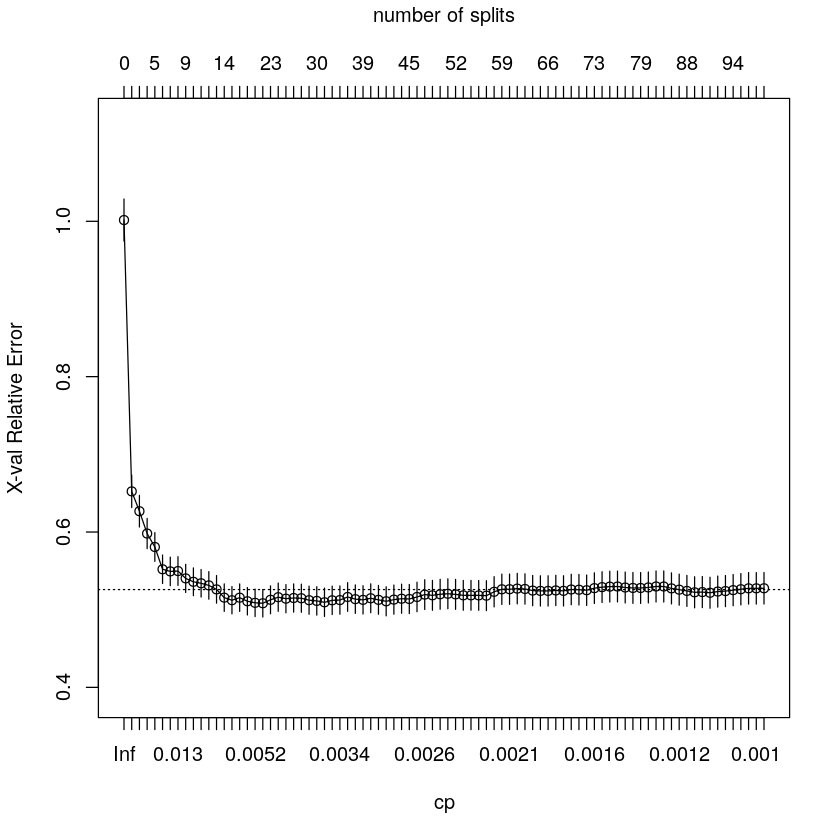

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.328,11.69,lmAll
10.950,13.33,lm.Insight1
13.470,16.23,lm.Insight2
10.950,13.33,lm.step.backward
10.950,13.33,lm.step.forward
8.623,10.60,rt.all.opt


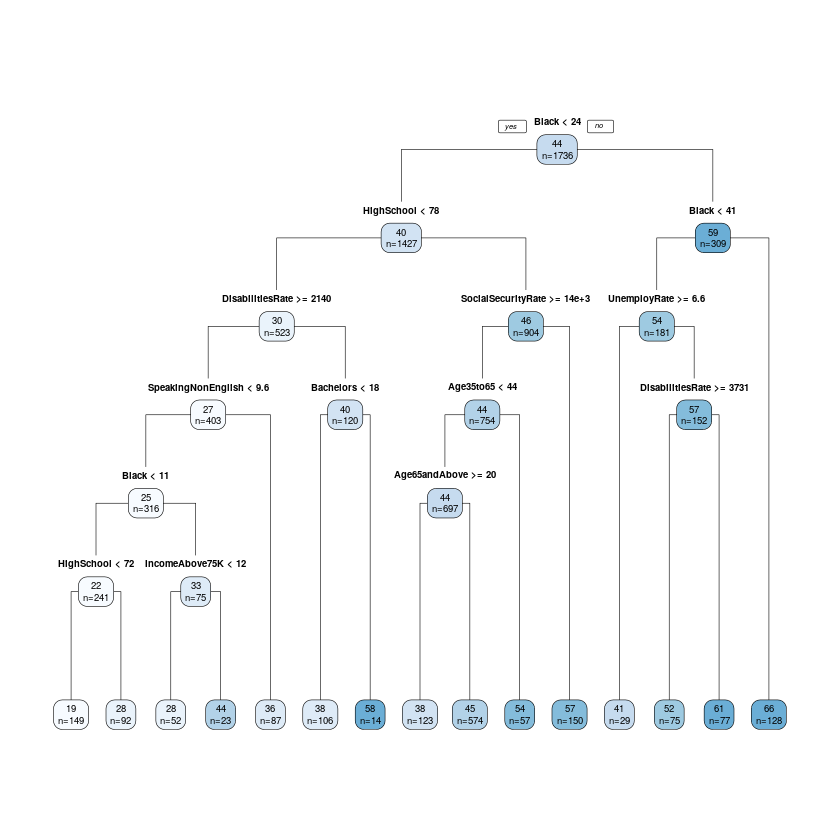

In [16]:
# Load packages
library(rpart)
library(rpart.plot)

#Fit the model to all census attributes

rt.all <- rpart(ObamaRate ~ MalesPer100Females+AgeBelow35+Age35to65+
                  Age65andAbove+White+Black+Asian+AmericanIndian+
                  Hawaiian+Hispanic+HighSchool+Bachelors+Poverty+
                  IncomeAbove75K+MedianIncome+AverageIncome+
                  UnemployRate+ManfEmploy+SpeakingNonEnglish+
                  Medicare+MedicareRate+SocialSecurity+
                  SocialSecurityRate+RetiredWorkers+Disabilities+
                  DisabilitiesRate+Homeowner+SameHouse1995and2000+
                  Pop+PopDensity+LandArea, 
                data = elect.df.known,  
                xval=10,  
                cp = 0.001)

#Diagnose the fitted decision tree
plotcp(rt.all,upper = "splits")

#Optimise the Decision Tree
# This function determines the optimal cp corresponding to the tree with the smallest number of splits that has 
# a xerror value less than the tree with the best (minimum) xerror value plus its standard error (xstd) 
optimalCP <- function(rt.model){
  df<-as.data.frame(rt.model$cptable)
  minerr <- min(df[,"xerror"])
  minerr.xstd <- df[df$xerror==minerr,"xstd"]
  df[df$xerror<minerr+minerr.xstd,][1,"CP"]}

(best_cp <- optimalCP(rt.all))

# We can now "prune" the rpart model back to an optimal number of splits using the optimised cp value
rt.all.opt <- prune(rt.all, cp=best_cp)

#Plot the Optimised Decision Tree
rpart.plot(rt.all.opt, type = 1, extra = 1) 

#Determine the Test Error Rate
rt.all.opt.pred <- predict(rt.all.opt, elect.df.test)

error <- genError(rt.all.opt.pred, elect.df.test$ObamaRate)

model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="rt.all.opt"))

model.results

[1] 0.00579599

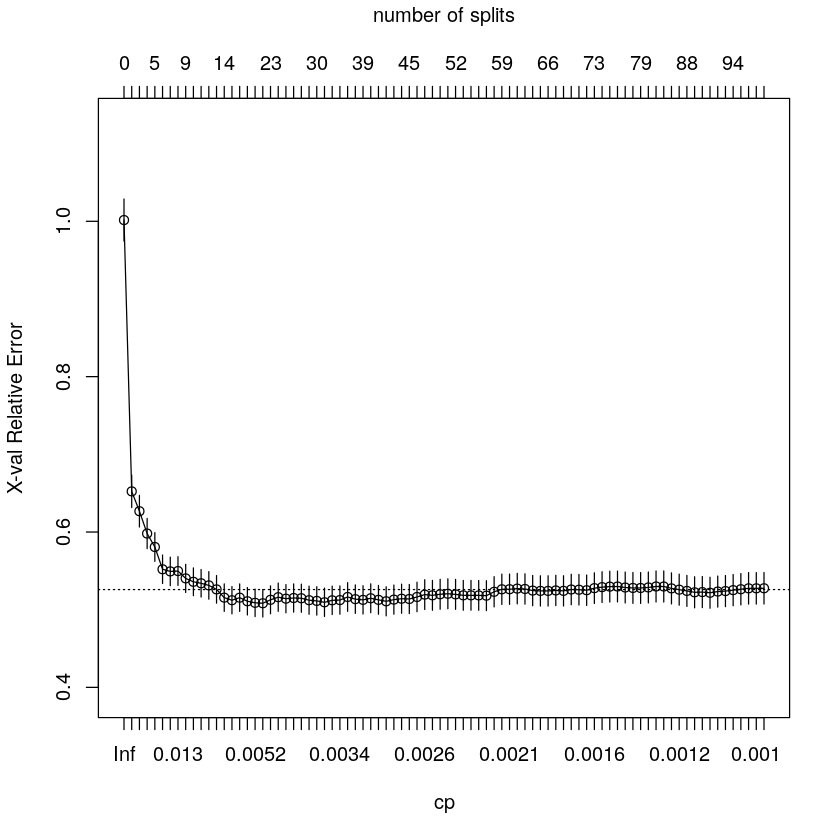

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.328,11.69,lmAll
10.950,13.33,lm.Insight1
13.470,16.23,lm.Insight2
10.950,13.33,lm.step.backward
10.950,13.33,lm.step.forward
8.623,10.60,rt.all.opt
9.357,11.61,rt.insight1.opt


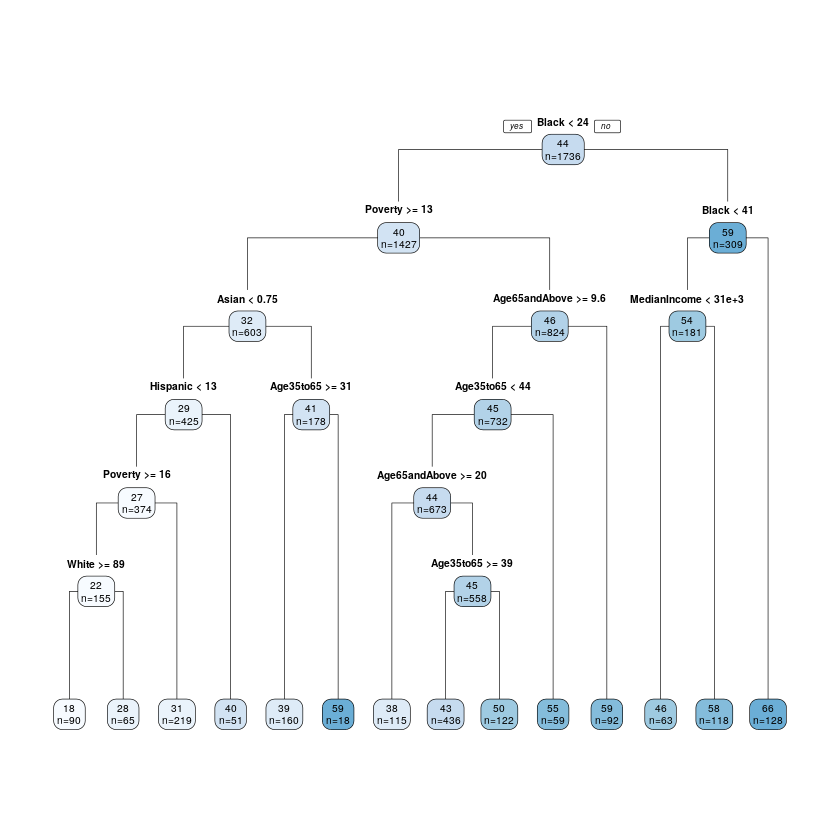

In [17]:
#Fit the model to demographics, age and wealth related attributes.

rt.insight1 <- rpart(ObamaRate ~ MalesPer100Females+AgeBelow35+Age35to65+
                  Age65andAbove+White+Black+Asian+AmericanIndian+
                  Hawaiian+Hispanic+Poverty+
                  IncomeAbove75K+MedianIncome+AverageIncome, 
                data = elect.df.known,  
                xval=10,  
                cp = 0.001)

#Diagnose the fitted decision tree
plotcp(rt.all,upper = "splits")

#Optimise the Decision Tree
# This function determines the optimal cp corresponding to the tree with the smallest number of splits that has 
# a xerror value less than the tree with the best (minimum) xerror value plus its standard error (xstd) 
optimalCP <- function(rt.model){
  df<-as.data.frame(rt.model$cptable)
  minerr <- min(df[,"xerror"])
  minerr.xstd <- df[df$xerror==minerr,"xstd"]
  df[df$xerror<minerr+minerr.xstd,][1,"CP"]}

(best_cp <- optimalCP(rt.insight1))

# We can now "prune" the rpart model back to an optimal number of splits using the optimised cp value
rt.insight1.opt <- prune(rt.insight1, cp=best_cp)

#Plot the Optimised Decision Tree
rpart.plot(rt.insight1.opt, type = 1, extra = 1) 

#Determine the Test Error Rate
rt.insight1.opt.pred <- predict(rt.insight1.opt, elect.df.test)

error <- genError(rt.insight1.opt.pred, elect.df.test$ObamaRate)

model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="rt.insight1.opt"))

model.results

[1] 0.006841389

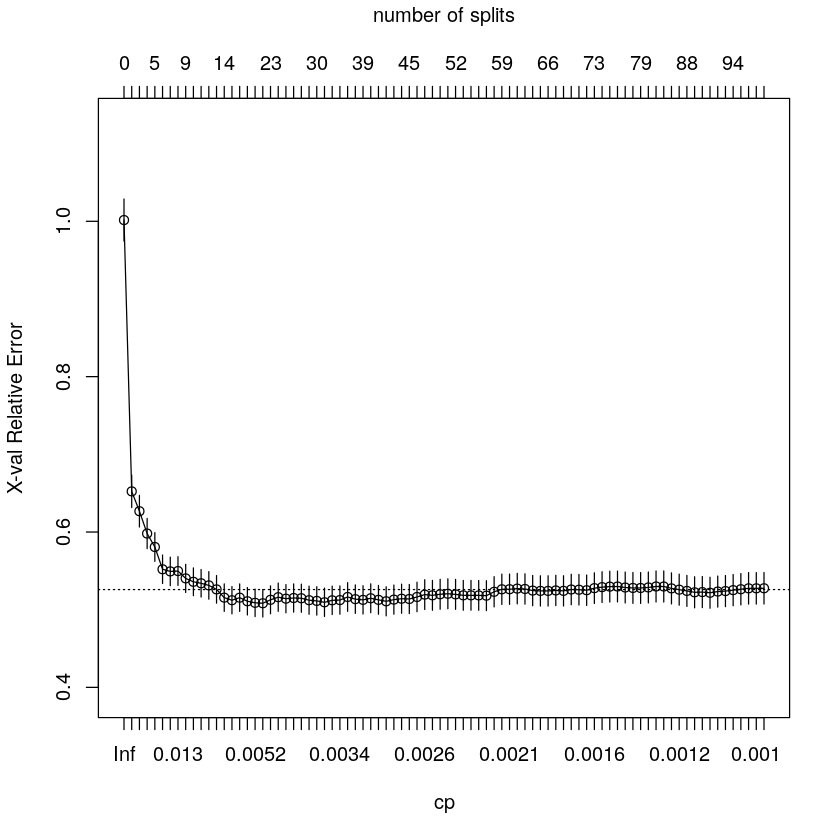

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.328,11.69,lmAll
10.950,13.33,lm.Insight1
13.470,16.23,lm.Insight2
10.950,13.33,lm.step.backward
10.950,13.33,lm.step.forward
8.623,10.60,rt.all.opt
9.357,11.61,rt.insight1.opt
11.290,13.49,rt.insight2.opt


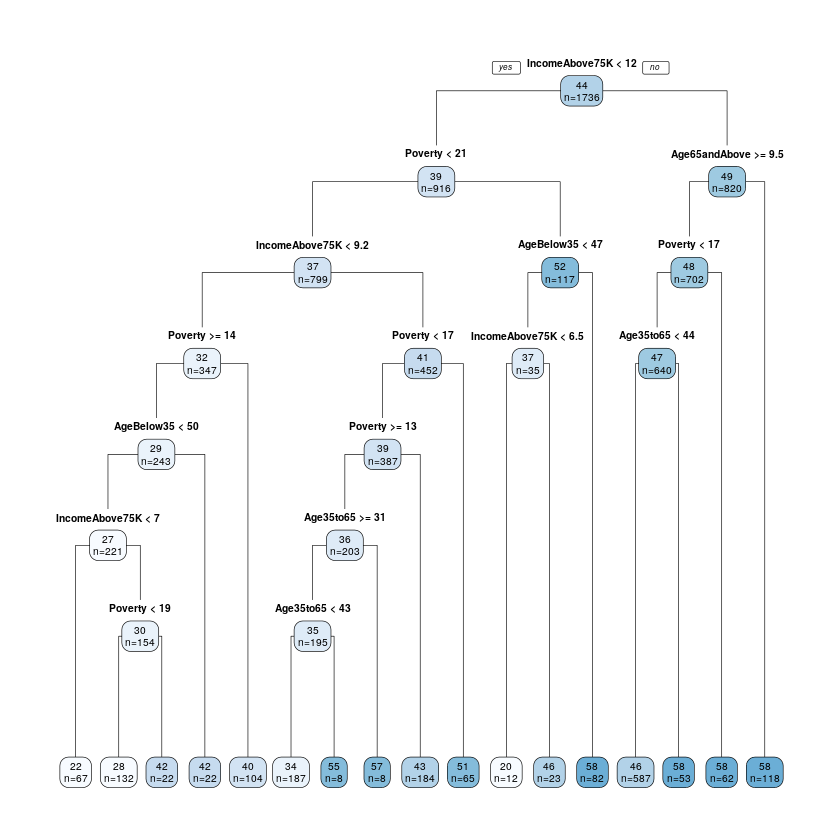

In [18]:
#Fit the model to age and wealth related attributes only.

rt.insight2 <- rpart(ObamaRate ~ AgeBelow35+Age35to65+
                  Age65andAbove+Poverty+
                  IncomeAbove75K+MedianIncome+AverageIncome, 
                data = elect.df.known,  
                xval=10,  
                cp = 0.001)

#Diagnose the fitted decision tree
plotcp(rt.all,upper = "splits")

#Optimise the Decision Tree
# This function determines the optimal cp corresponding to the tree with the smallest number of splits that has 
# a xerror value less than the tree with the best (minimum) xerror value plus its standard error (xstd) 
optimalCP <- function(rt.model){
  df<-as.data.frame(rt.model$cptable)
  minerr <- min(df[,"xerror"])
  minerr.xstd <- df[df$xerror==minerr,"xstd"]
  df[df$xerror<minerr+minerr.xstd,][1,"CP"]}

(best_cp <- optimalCP(rt.all))

# We can now "prune" the rpart model back to an optimal number of splits using the optimised cp value
rt.insight2.opt <- prune(rt.insight2, cp=best_cp)

#Plot the Optimised Decision Tree
rpart.plot(rt.insight2.opt, type = 1, extra = 1) 

#Determine the Test Error Rate
rt.insight2.opt.pred <- predict(rt.insight2.opt, elect.df.test)

error <- genError(rt.insight2.opt.pred, elect.df.test$ObamaRate)

model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="rt.insight2.opt"))

model.results

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("glmnet", repos = "http://cran.us.r-project.org"):
“installation of package ‘glmnet’ had non-zero exit status”
Loading required package: Matrix

Loaded glmnet 4.1-3



[1] 5.1 4.1 4.1 2.1

33 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -7.122936e+00
MalesPer100Females    .           
AgeBelow35            .           
Age35to65             .           
Age65andAbove         .           
White                 .           
Black                 6.046940e-01
Asian                 .           
AmericanIndian        .           
Hawaiian              .           
Hispanic              .           
HighSchool            6.146558e-01
Bachelors             2.045910e-01
Poverty               .           
IncomeAbove75K        .           
MedianIncome          .           
AverageIncome         .           
UnemployRate          .           
ManfEmploy            .           
SpeakingNonEnglish    .           
Medicare              .           
MedicareRate          .           
SocialSecurity       -1.022797e-05
SocialSecurityRate   -2.715899e-04
RetiredWorkers       -4.662435e-06
Disabilities          .           
DisabilitiesR

[1] 0.002049248

[1] -6.190283

33 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -1.995030e+02
MalesPer100Females   -2.796765e-02
AgeBelow35            2.770089e-01
Age35to65             .           
Age65andAbove        -3.390505e-01
White                 1.786719e+00
Black                 2.627747e+00
Asian                 1.633144e+00
AmericanIndian        1.927689e+00
Hawaiian              4.572499e+00
Hispanic              2.125198e-01
HighSchool            6.085871e-01
Bachelors             5.923841e-01
Poverty              -1.053116e+00
IncomeAbove75K       -2.046423e-01
MedianIncome         -2.198406e-04
AverageIncome         7.834984e-05
UnemployRate          6.383525e-01
ManfEmploy           -1.210322e-01
SpeakingNonEnglish   -7.966103e-02
Medicare              2.050035e-04
MedicareRate          2.024846e-04
SocialSecurity       -3.586313e-04
SocialSecurityRate   -2.191958e-04
RetiredWorkers        1.215094e-08
Disabilities          5.328290e-06
DisabilitiesR

[1] 0.07715286

[1] -2.561967

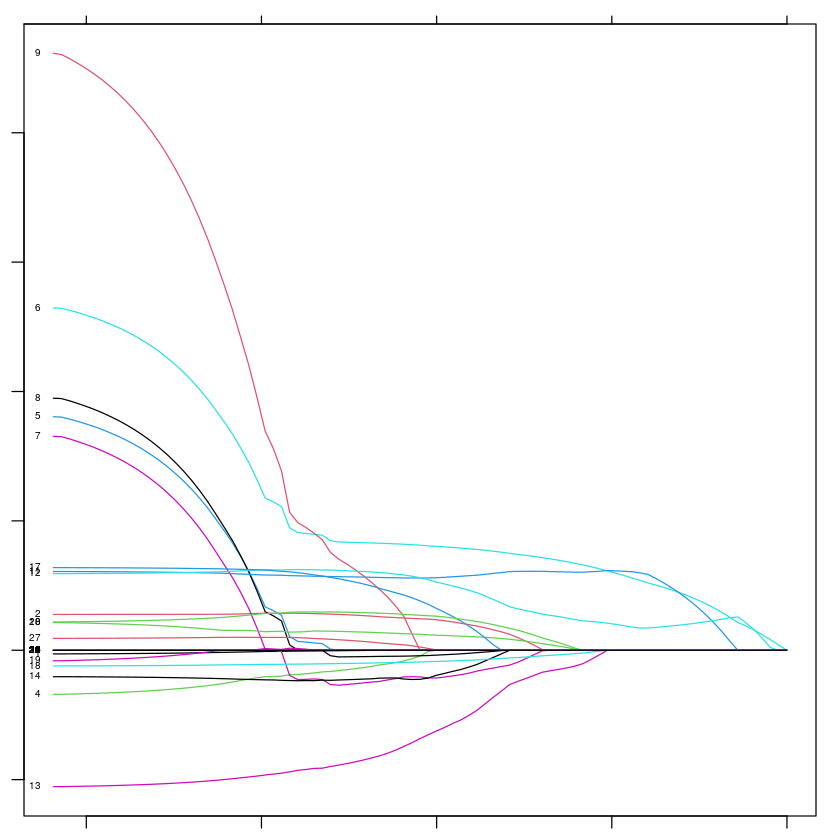

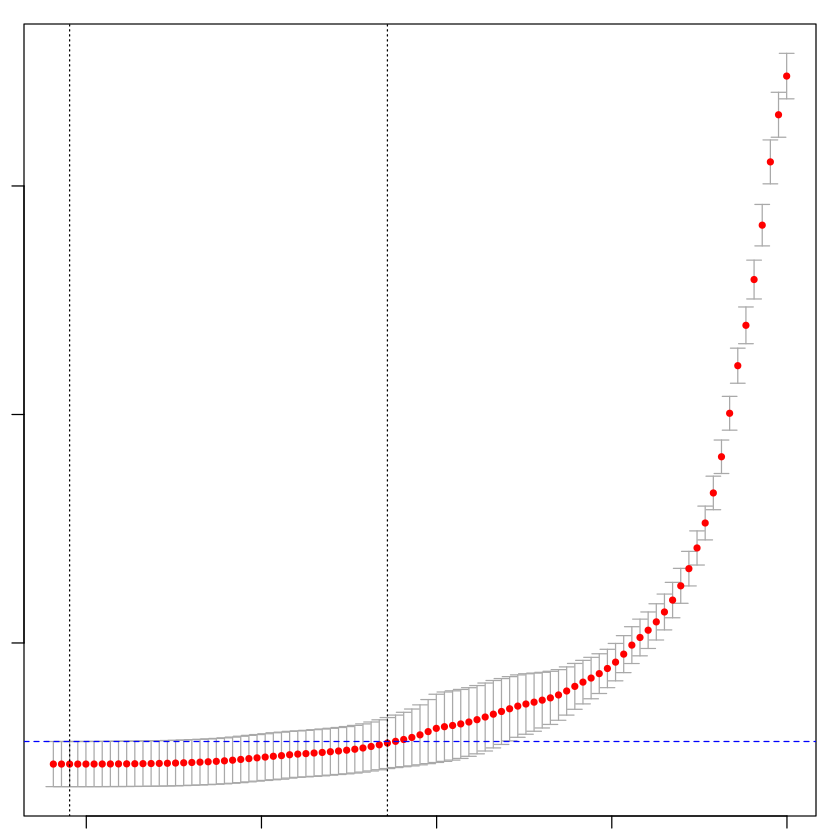

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.144,11.34,lm.lasso (lambda.min)
9.303,11.39,lm.lasso (lambda.1se)


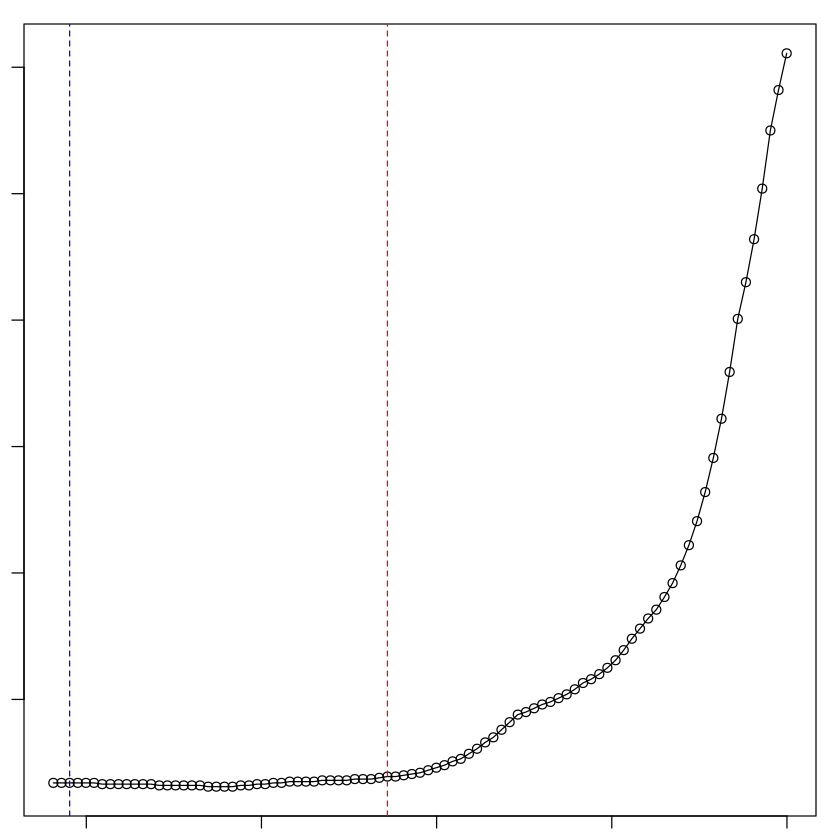

In [19]:
##### (1)CREATING LASSO MODEL WITH ALL ATTRIBUTES

install.packages("glmnet", repos = "http://cran.us.r-project.org")
library(glmnet)

#splitting dependent and independent variables

startCol <- which(names(elect.df)=="MalesPer100Females") 
endCol <- which(names(elect.df)=="FarmArea")

xknown <- as.matrix(elect.df.known[, startCol:endCol]) 

yknown <- elect.df.known$ObamaRate


#Generate lasso model
lm.lasso <- glmnet(xknown, yknown, family = "gaussian")

#Plotting the model
par("mar")
par(mar=c(1,1,1,1))
plot(lm.lasso, xvar = "lambda", label = TRUE)  

#Coefficients given lambda
coef(lm.lasso, s = 1)

#Cross-validation with 10 folds
set.seed(101)

lm.lasso.cv <- cv.glmnet(xknown, yknown, nfolds = 10, family = "gaussian")  

#Finding minimum lambda and log lambda values
lm.lasso.cv$lambda.min
log(lm.lasso.cv$lambda.min)

#Coefficients of linear regression model with lambda min
coef(lm.lasso.cv, s = "lambda.min")  

lm.lasso.cv$lambda.1se
log(lm.lasso.cv$lambda.1se)

idx_min=which(lm.lasso.cv$lambda==lm.lasso.cv$lambda.min)
plot(lm.lasso.cv)
abline(h=lm.lasso.cv$cvup[idx_min], lty=2, col='blue')


#Determining test error rate
xtest <- as.matrix(elect.df.test[, startCol:endCol])

# For lambda.min
lm.lasso.min.pred <- predict(lm.lasso.cv, newx = xtest, s = "lambda.min")
error_min <- genError(lm.lasso.min.pred, elect.df.test$ObamaRate)
# For lambda.1se
lm.lasso.1se.pred <- predict(lm.lasso.cv, newx = xtest, s = "lambda.1se")
error_1se <- genError(lm.lasso.1se.pred, elect.df.test$ObamaRate)
# For different lambda values
errorvals <- as.data.frame(t(sapply(lm.lasso.cv$lambda, function(lambda){genError(predict(lm.lasso.cv, newx = xtest, s = lambda),
elect.df.test$ObamaRate)})))

#plot the test errors (RMSEs) of different regression models against different log lambda values. 
plot(log(lm.lasso.cv$lambda),errorvals$RMSE, xlab="log lambda", ylab="error (rmse)", type="o" )
abline(v = log(lm.lasso.cv$lambda.min), lty=2, col='blue')
abline(v = log(lm.lasso.cv$lambda.1se), lty=2, col='red') 

#Store the error rates of regression models with lambda

model.results <- data.frame(MAE = error_min$MAE, RMSE = error_min$RMSE, Model="lm.lasso (lambda.min)")
model.results <- rbind(model.results, data.frame(MAE = error_1se$MAE,  RMSE = error_1se$RMSE, Model="lm.lasso (lambda.1se)"))
model.results

[1] 5.1 4.1 4.1 2.1

14 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    34.5453687127
AgeBelow35      0.2721362475
Age35to65       .           
Age65andAbove   .           
Poverty        -1.0135271053
IncomeAbove75K  0.0691148512
MedianIncome    .           
AverageIncome   0.0001152454
White           .           
Black           0.5690041481
Asian           .           
AmericanIndian  .           
Hawaiian        .           
Hispanic        .           

[1] 0.0007364614

[1] -7.213654

14 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    -2.162476e+02
AgeBelow35      5.471283e-01
Age35to65       6.123522e-03
Age65andAbove  -1.011988e-01
Poverty        -2.171779e+00
IncomeAbove75K  3.232493e-01
MedianIncome   -4.814861e-04
AverageIncome   2.951750e-04
White           2.647656e+00
Black           3.404079e+00
Asian           2.409495e+00
AmericanIndian  3.103607e+00
Hawaiian        6.926631e+00
Hispanic        1.116179e-01

[1] 0.2837975

[1] -1.259494

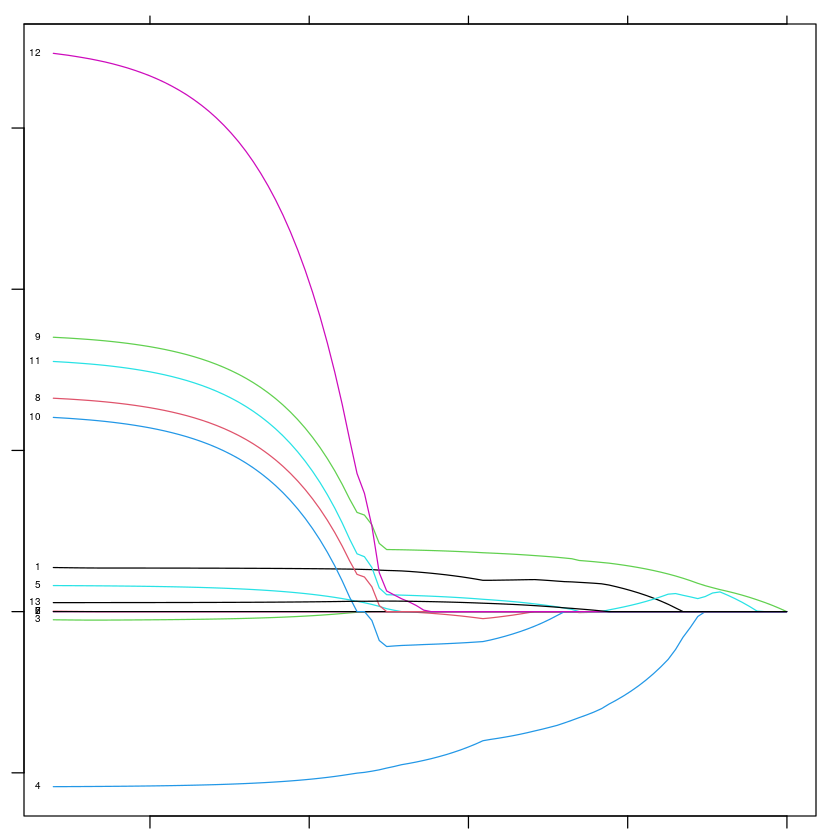

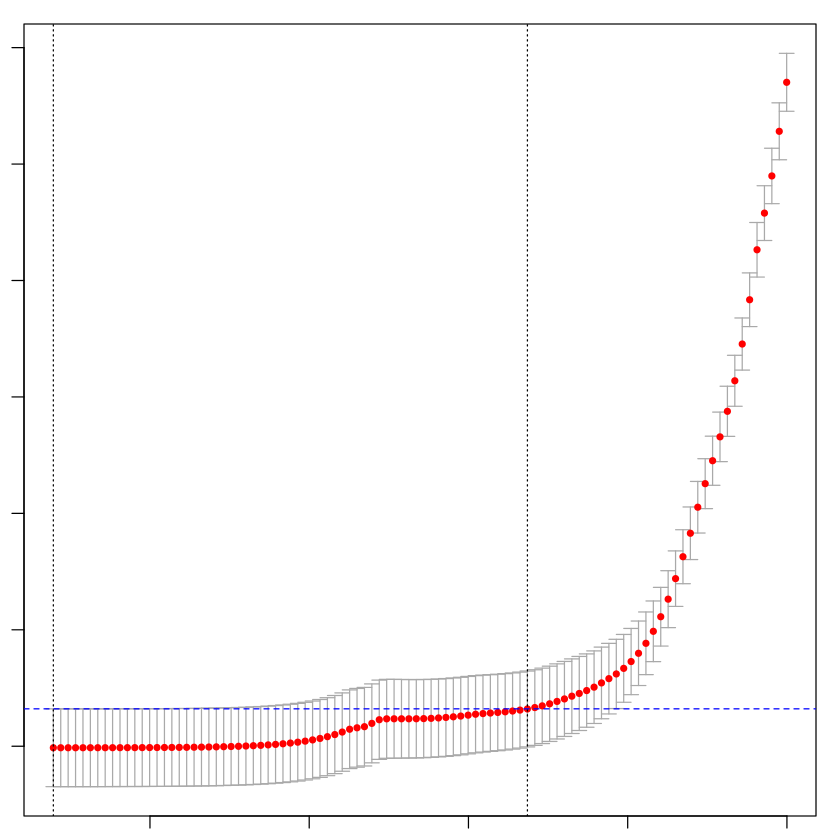

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.144,11.34,lm.lasso (lambda.min)
9.303,11.39,lm.lasso (lambda.1se)
10.840,13.19,lm.lasso2 (lambda.min)
11.190,13.42,lm.lasso2 (lambda.1se)


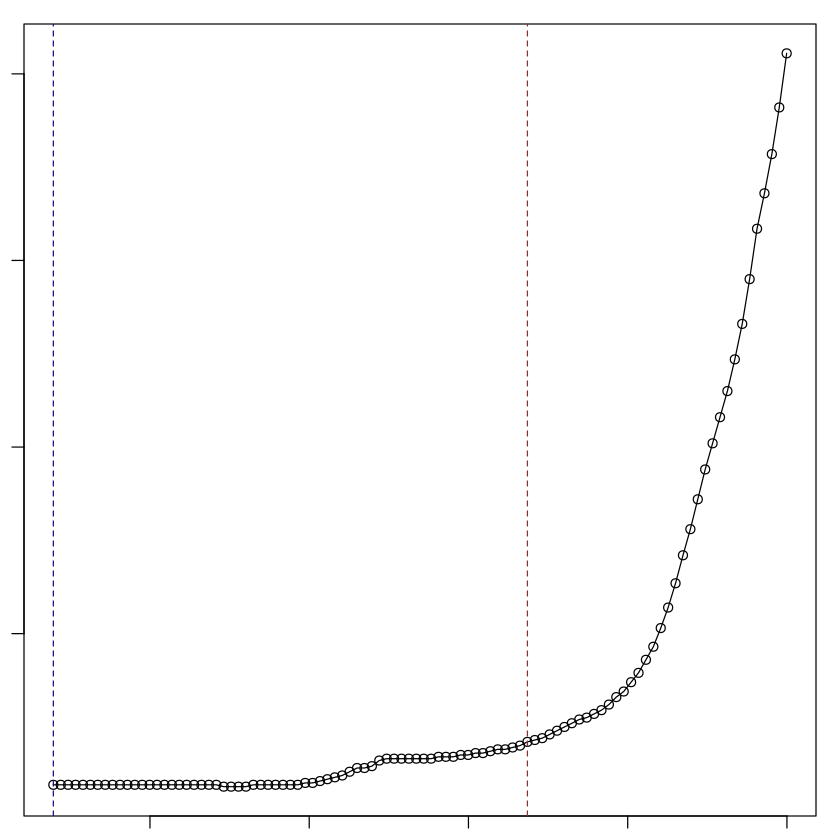

In [20]:
##### (2)CREATING LASSO MODEL WITH AGE,INCOME AND OTHER DEMOGRAPHICS
xknownFew <- as.matrix(subset(elect.df.known, select = c(AgeBelow35,Age35to65,Age65andAbove,Poverty,IncomeAbove75K,MedianIncome,AverageIncome, White,Black,Asian,AmericanIndian,Hawaiian,Hispanic) )) 
yknown <- elect.df.known$ObamaRate


#Generate lasso model
lm.lasso2 <- glmnet(xknownFew, yknown, family = "gaussian")

#Plotting the model
par("mar")

par(mar=c(1,1,1,1))
plot(lm.lasso2, xvar = "lambda", label = TRUE)  

#Coefficients given lambda
coef(lm.lasso2, s = 1)

#Cross-validation with 10 folds
set.seed(101)

lm.lasso2.cv <- cv.glmnet(xknownFew, yknown, nfolds = 10, family = "gaussian")  

#Finding minimum lambda and log lambda values
lm.lasso2.cv$lambda.min
log(lm.lasso2.cv$lambda.min)

#Coefficients of linear regression model with lambda min
coef(lm.lasso2.cv, s = "lambda.min")  

lm.lasso2.cv$lambda.1se
log(lm.lasso2.cv$lambda.1se)

idx_min2=which(lm.lasso2.cv$lambda==lm.lasso2.cv$lambda.min)
plot(lm.lasso2.cv)
abline(h=lm.lasso2.cv$cvup[idx_min2], lty=2, col='blue')

#Determining test error rate
xtest2 <- as.matrix(subset(elect.df.test, select = c(AgeBelow35,Age35to65,Age65andAbove,Poverty,IncomeAbove75K, MedianIncome,AverageIncome,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic)  )) 

# For lambda.min
lm.lasso2.min.pred <- predict(lm.lasso2.cv, newx = xtest2, s = "lambda.min")
error2_min <- genError(lm.lasso2.min.pred, elect.df.test$ObamaRate)
# For lambda.1se
lm.lasso2.1se.pred <- predict(lm.lasso2.cv, newx = xtest2, s = "lambda.1se")
error2_1se <- genError(lm.lasso2.1se.pred, elect.df.test$ObamaRate)
# For different lambda values
errorvals2 <- as.data.frame(t(sapply(lm.lasso2.cv$lambda, function(lambda){genError(predict(lm.lasso2.cv, newx = xtest2, s = lambda),
                                                                                    elect.df.test$ObamaRate)})))
#plot the test errors (RMSEs) of different regression models against different log lambda values. 
plot(log(lm.lasso2.cv$lambda),errorvals2$RMSE, xlab="log lambda", ylab="error (rmse)", type="o" )
abline(v = log(lm.lasso2.cv$lambda.min), lty=2, col='blue')
abline(v = log(lm.lasso2.cv$lambda.1se), lty=2, col='red') 

#Store the error rates of regression models with lambda

model.results <- rbind(model.results, data.frame(MAE = error2_min$MAE,  RMSE = error2_min$RMSE, Model="lm.lasso2 (lambda.min)"))
model.results <- rbind(model.results, data.frame(MAE = error2_1se$MAE,  RMSE = error2_1se$RMSE, Model="lm.lasso2 (lambda.1se)"))
model.results

[1] 5.1 4.1 4.1 2.1

8 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    30.5299250314
AgeBelow35      0.2238682095
Age35to65       .           
Age65andAbove  -0.3410889057
Poverty         .           
IncomeAbove75K  0.2778786328
MedianIncome    .           
AverageIncome   0.0001415994

[1] 0.002947544

[1] -5.826783

8 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    33.9293882158
AgeBelow35      0.3661990062
Age35to65       .           
Age65andAbove  -0.4435918954
Poverty        -0.1707784276
IncomeAbove75K  0.7008851857
MedianIncome   -0.0004209451
AverageIncome   0.0003068051

[1] 1.368129

[1] 0.313444

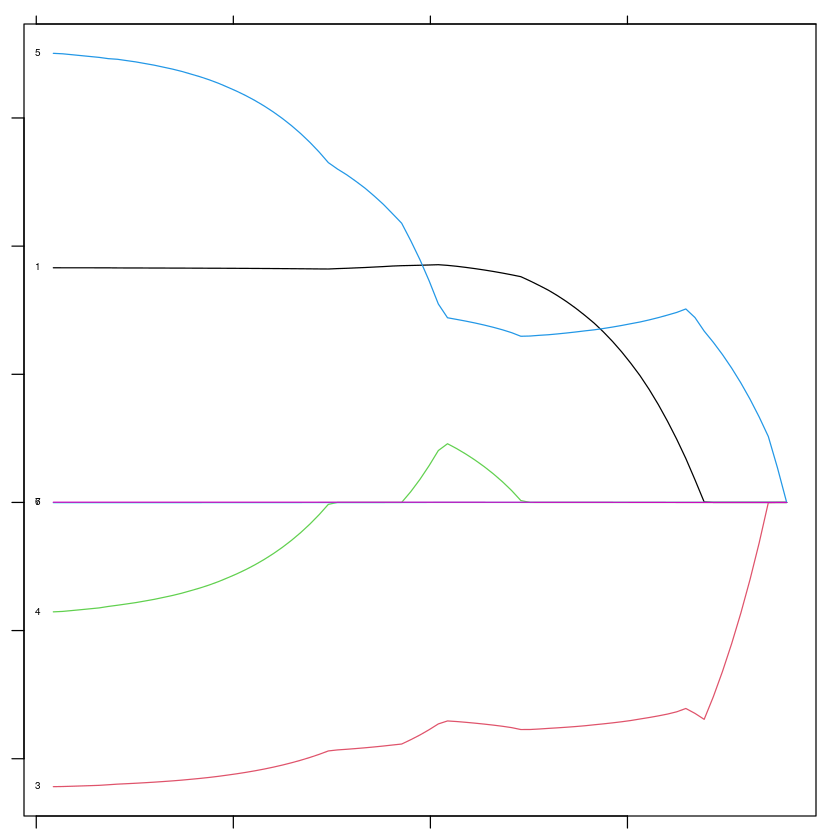

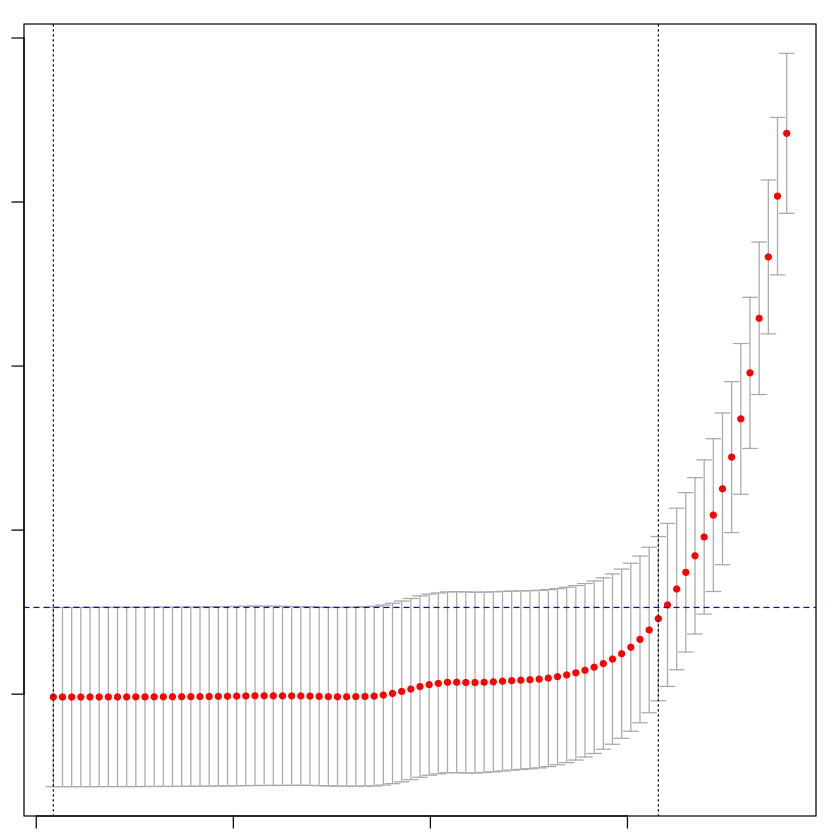

MAE,RMSE,Model
<dbl>,<dbl>,<chr>
9.144,11.34,lm.lasso (lambda.min)
9.303,11.39,lm.lasso (lambda.1se)
10.840,13.19,lm.lasso2 (lambda.min)
11.190,13.42,lm.lasso2 (lambda.1se)
13.420,16.15,lm.lasso3 (lambda.min)
13.630,16.30,lm.lasso3 (lambda.1se)


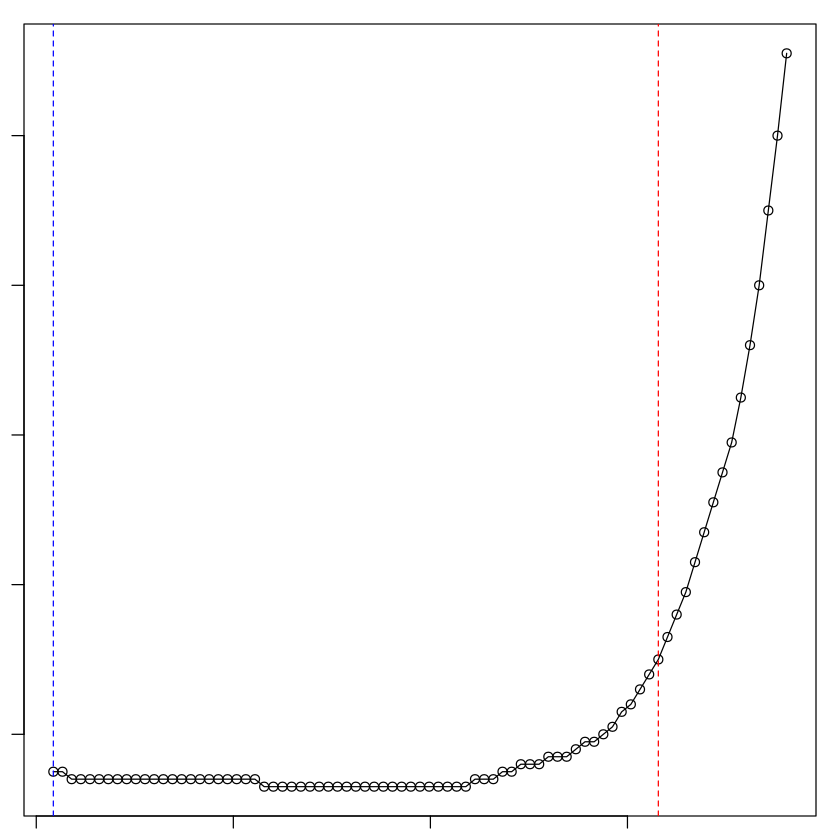

In [21]:
##### (3)CREATING LASSO MODEL WITH AGE AND INCOME ATTRIBUTES
xknownAI <- as.matrix(subset(elect.df.known, select = c(AgeBelow35,Age35to65,Age65andAbove,Poverty,IncomeAbove75K,MedianIncome,AverageIncome) )) 
yknown <- elect.df.known$ObamaRate


#Generate lasso model
lm.lasso3 <- glmnet(xknownAI, yknown, family = "gaussian")

#Plotting the model
par("mar")

par(mar=c(1,1,1,1))
plot(lm.lasso3, xvar = "lambda", label = TRUE)  

#Coefficients given lambda
coef(lm.lasso3, s = 1)

#Cross-validation with 10 folds
set.seed(101)

lm.lasso3.cv <- cv.glmnet(xknownAI, yknown, nfolds = 10, family = "gaussian")  

#Finding minimum lambda and log lambda values
lm.lasso3.cv$lambda.min
log(lm.lasso3.cv$lambda.min)

#Coefficients of linear regression model with lambda min
coef(lm.lasso3.cv, s = "lambda.min")  

lm.lasso3.cv$lambda.1se
log(lm.lasso3.cv$lambda.1se)

idx_min3=which(lm.lasso3.cv$lambda==lm.lasso3.cv$lambda.min)
plot(lm.lasso3.cv)
abline(h=lm.lasso3.cv$cvup[idx_min3], lty=2, col='blue')

#Determining test error rate
xtest3 <- as.matrix(subset(elect.df.test, select = c(AgeBelow35,Age35to65,Age65andAbove,Poverty,IncomeAbove75K,MedianIncome,AverageIncome) )) 

# For lambda.min
lm.lasso3.min.pred <- predict(lm.lasso3.cv, newx = xtest3, s = "lambda.min")
error3_min <- genError(lm.lasso3.min.pred, elect.df.test$ObamaRate)
# For lambda.1se
lm.lasso3.1se.pred <- predict(lm.lasso3.cv, newx = xtest3, s = "lambda.1se")
error3_1se <- genError(lm.lasso3.1se.pred, elect.df.test$ObamaRate)
# For different lambda values
errorvals3 <- as.data.frame(t(sapply(lm.lasso3.cv$lambda, function(lambda){genError(predict(lm.lasso3.cv, newx = xtest3, s = lambda),
                                                                                  elect.df.test$ObamaRate)})))
#plot the test errors (RMSEs) of different regression models against different log lambda values. 
plot(log(lm.lasso3.cv$lambda),errorvals3$RMSE, xlab="log lambda", ylab="error (rmse)", type="o" )
abline(v = log(lm.lasso3.cv$lambda.min), lty=2, col='blue')
abline(v = log(lm.lasso3.cv$lambda.1se), lty=2, col='red') 

#Store the error rates of regression models with lambda

model.results <- rbind(model.results, data.frame(MAE = error3_min$MAE,  RMSE = error3_min$RMSE, Model="lm.lasso3 (lambda.min)"))
model.results <- rbind(model.results, data.frame(MAE = error3_1se$MAE,  RMSE = error3_1se$RMSE, Model="lm.lasso3 (lambda.1se)"))
model.results

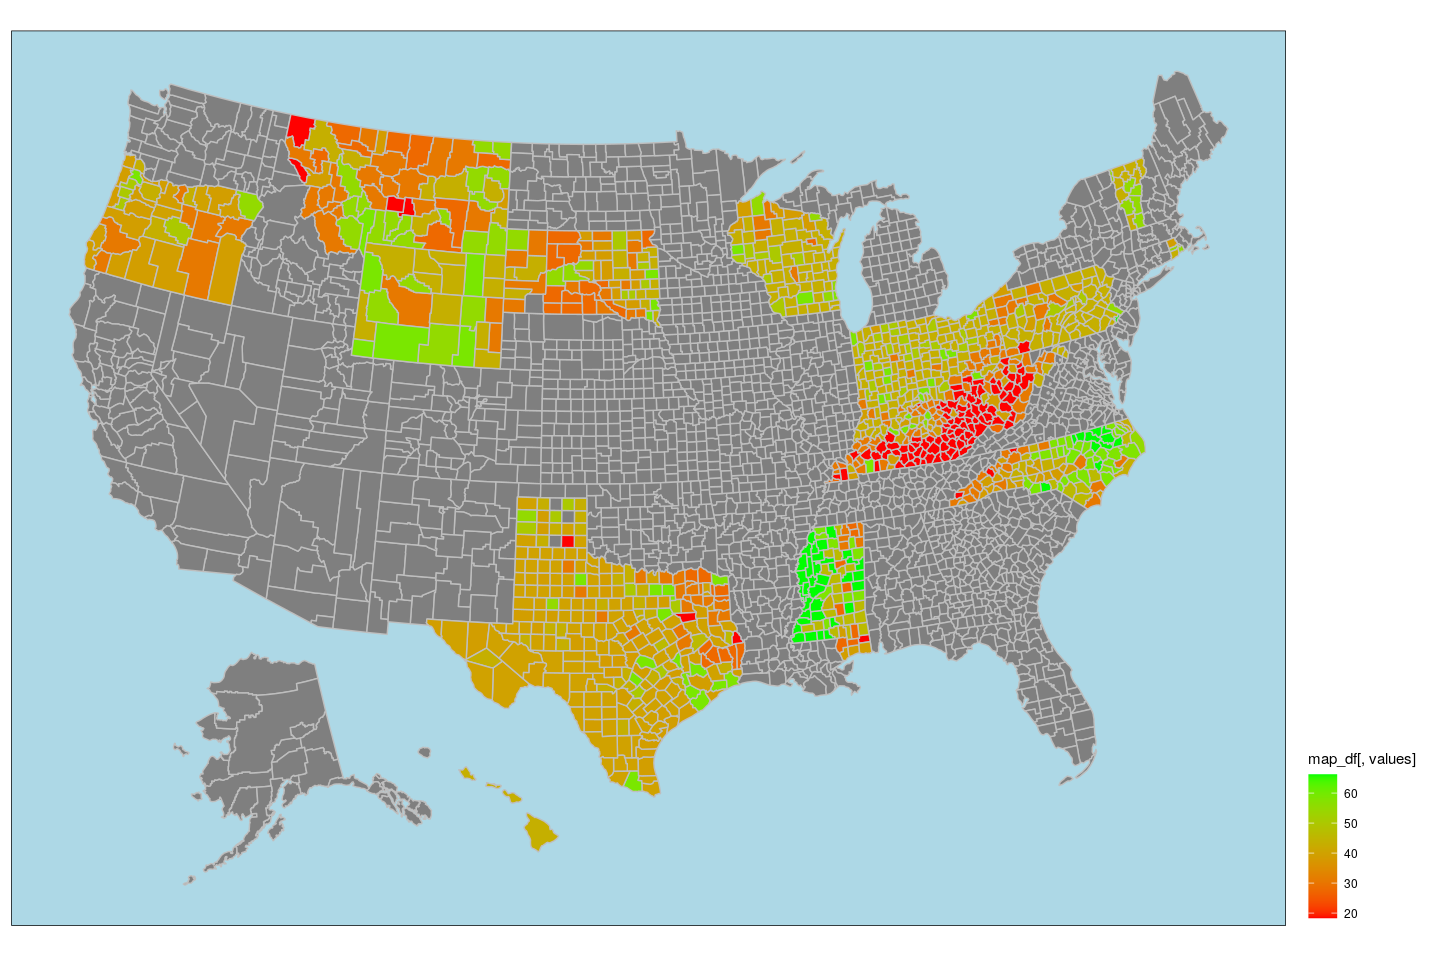

In [22]:
unknown.pred <- predict(rt.insight1.opt, elect.df.unknown)
predictions.df <- elect.df.unknown 
predictions.df$PredictedObamaRate <- unknown.pred

library(usmap)
library(ggplot2)

pred_obama=data.frame(fips=predictions.df$FIPS,value=predictions.df$PredictedObamaRate)

options(repr.plot.width=12, repr.plot.height=8)
plot_usmap(regions = "counties",data = pred_obama, values = "value", color = "grey") + 
  scale_fill_gradient(low = "red", high = "green") + 
  theme(panel.background = element_rect(color = "black", fill = "lightblue"),legend.position = "right")

In [47]:
install.packages("caret")
install.packages("zoo")
install.packages("forecast")
install.packages("tidyr")
install.packages("dplyr")


library(tidyr)
library(dplyr)

# generate a separate Year column attribute and Month column attribute

baby.df <- read.csv('US_Births.csv')
baby.df$Date <- as.Date(paste(as.character(baby.df$Yr_Mo),"1", sep=""), format = "%Y%m%d")
baby.df_2 <- separate(baby.df, Date, c("Year", "Month", "Day"))

baby.df_2 <- baby.df_2 %>% select(Yr_Mo,Live.Births, Year, Month)
baby.df_2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("zoo"):
“installation of package ‘zoo’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("tidyr"):
“installation of package ‘tidyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


Yr_Mo,Live.Births,Year,Month
<int>,<int>,<chr>,<chr>
200701,354943,2007,01
200702,326891,2007,02
200703,360828,2007,03
200704,338224,2007,04
200705,362319,2007,05
200706,358606,2007,06
200707,379616,2007,07
200708,390378,2007,08
200709,366904,2007,09


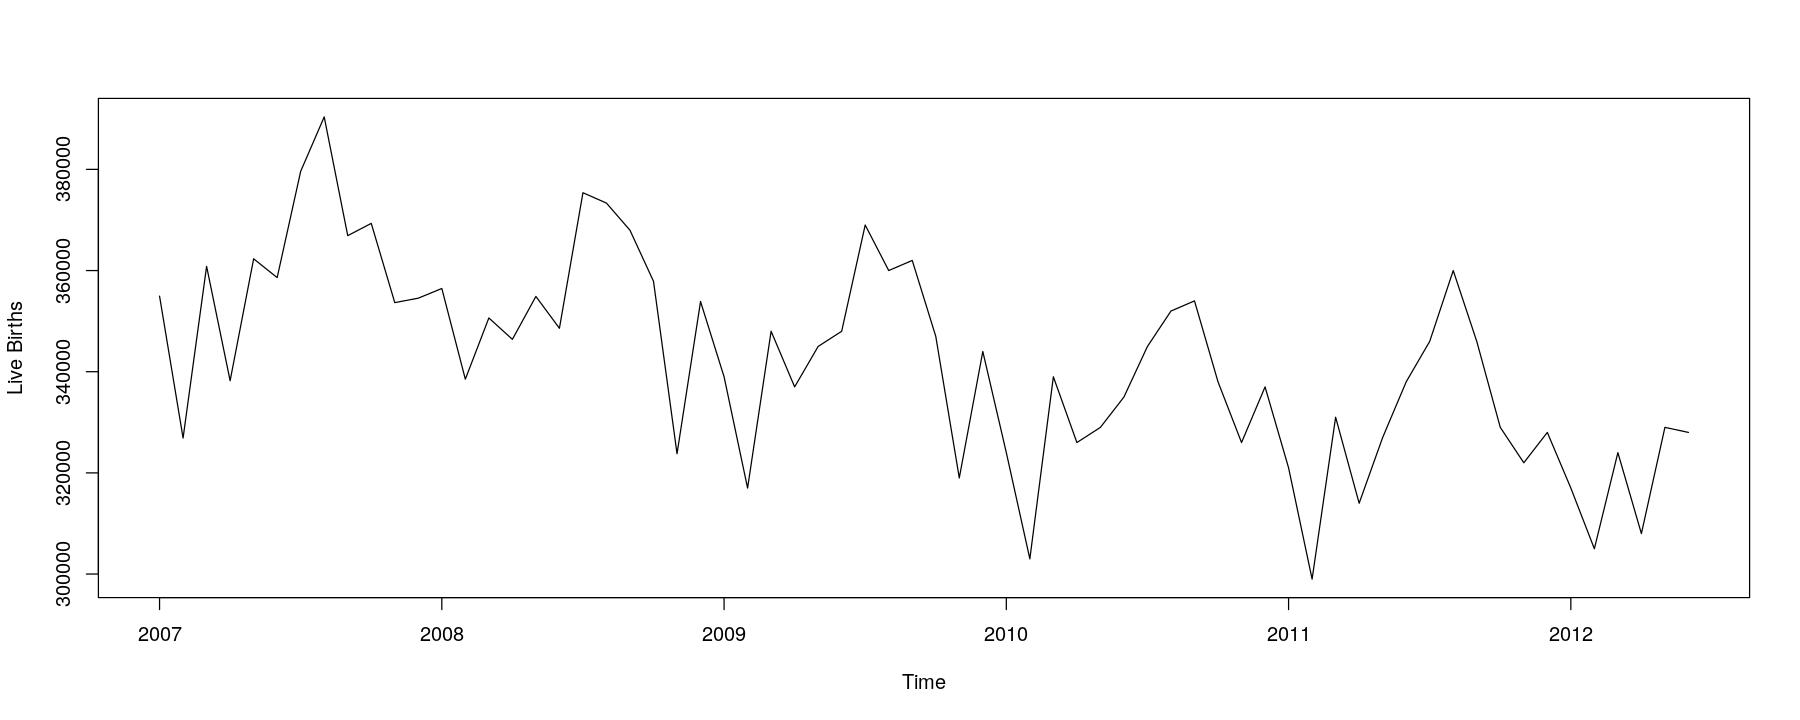

In [24]:
# Store data as a Time-Series Object

library(repr)

Live.Births.ts <- ts(baby.df_2$Live.Births,
                     start = c(2007, 1),
                     end = c(2012, 6),
                     freq = 12)

#plot the time series object

options(repr.plot.width = 15, repr.plot.height = 6)
plot(Live.Births.ts, ylab = "Live Births")

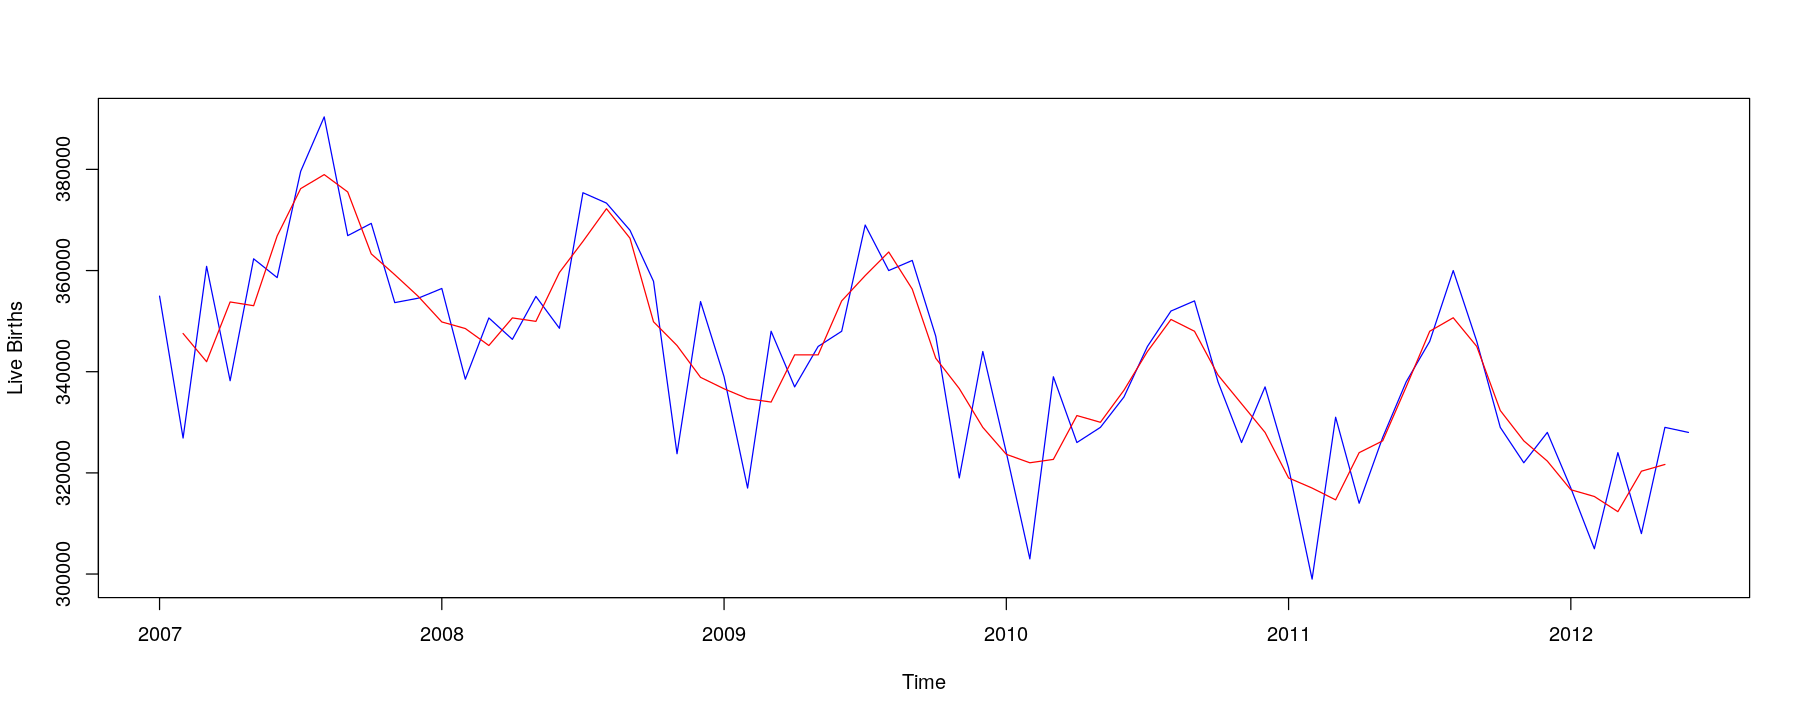

In [36]:
#plot the original time series object and the centred moving average

library(caret)
library(zoo)
library(forecast)
Live.Births.ma_c = rollmean(Live.Births.ts, 3, align = 'center')
plot(Live.Births.ts, ylab = "Live Births", col = 'blue')
lines(Live.Births.ma_c, col = 'red')

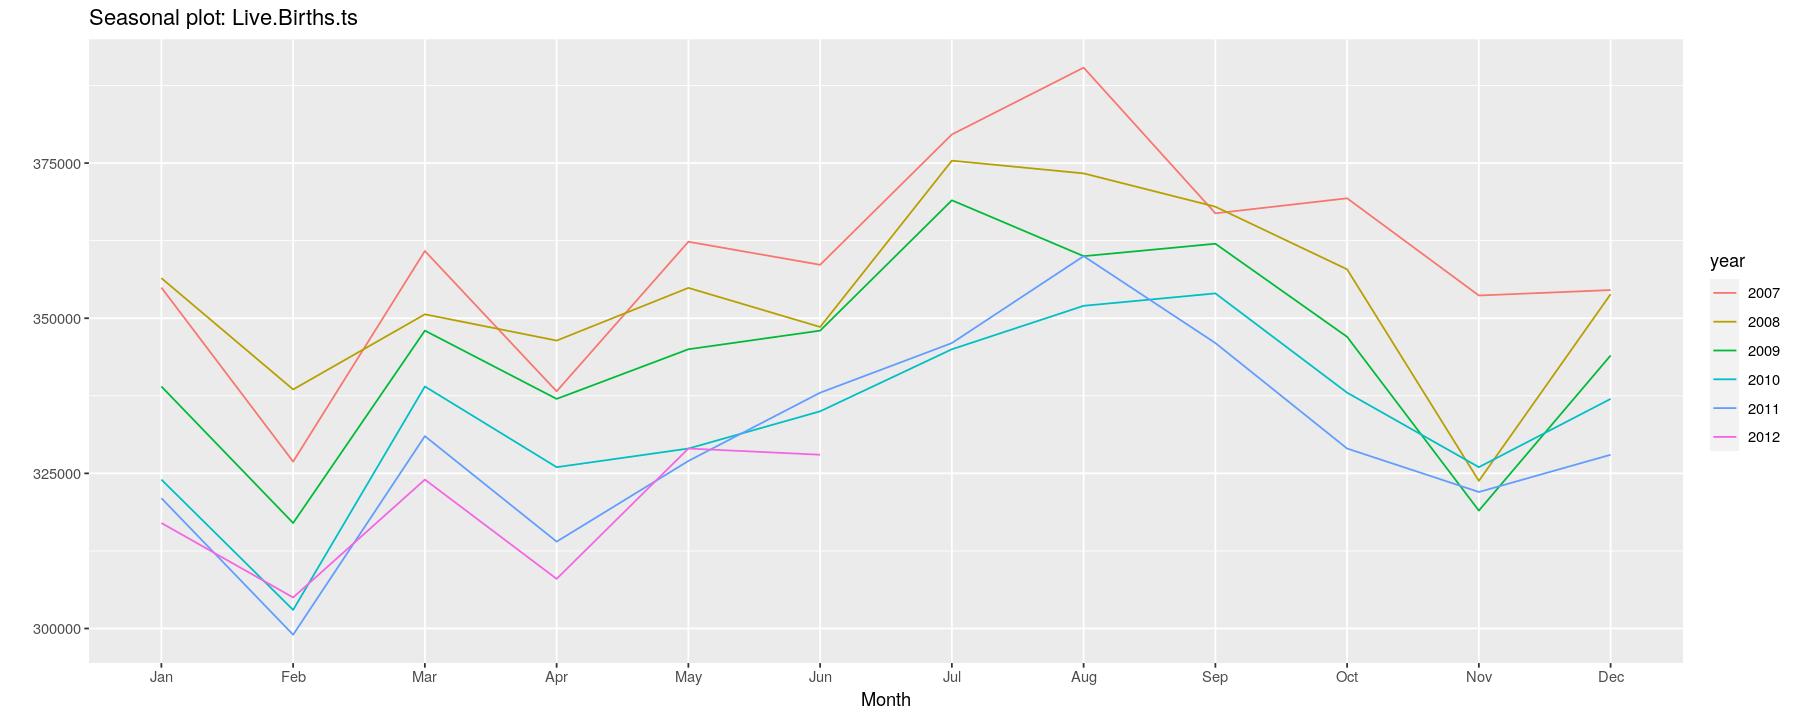

In [37]:
# make a seasonal plot for live births for each year
library(ggplot2)
ggseasonplot(Live.Births.ts)

# in the plot you must exclude the year 2012!!! since there is no full info

In [38]:
# Generate a Holt's linear model
(Live.Births.ets.AAN <- ets(Live.Births.ts, model = "AAN"))

ETS(A,Ad,N) 

Call:
 ets(y = Live.Births.ts, model = "AAN") 

  Smoothing parameters:
    alpha = 0.555 
    beta  = 1e-04 
    phi   = 0.8002 

  Initial states:
    l = 349753.5325 
    b = 4107.9239 

  sigma:  16175.99

     AIC     AICc      BIC 
1562.567 1563.991 1575.705 

In [39]:
# check RMSE error for the 'AAN' model
rmse.ets <- function(etsmodel) sqrt(etsmodel$mse)
(error <- rmse.ets(Live.Births.ets.AAN))

# save RMSE error for the 'AAN' model
Live.Births.rmse = data.frame(RMSE = error, Model ="AAN")
Live.Births.rmse

[1] 15551.19

RMSE,Model
<dbl>,<chr>
15551.19,AAN


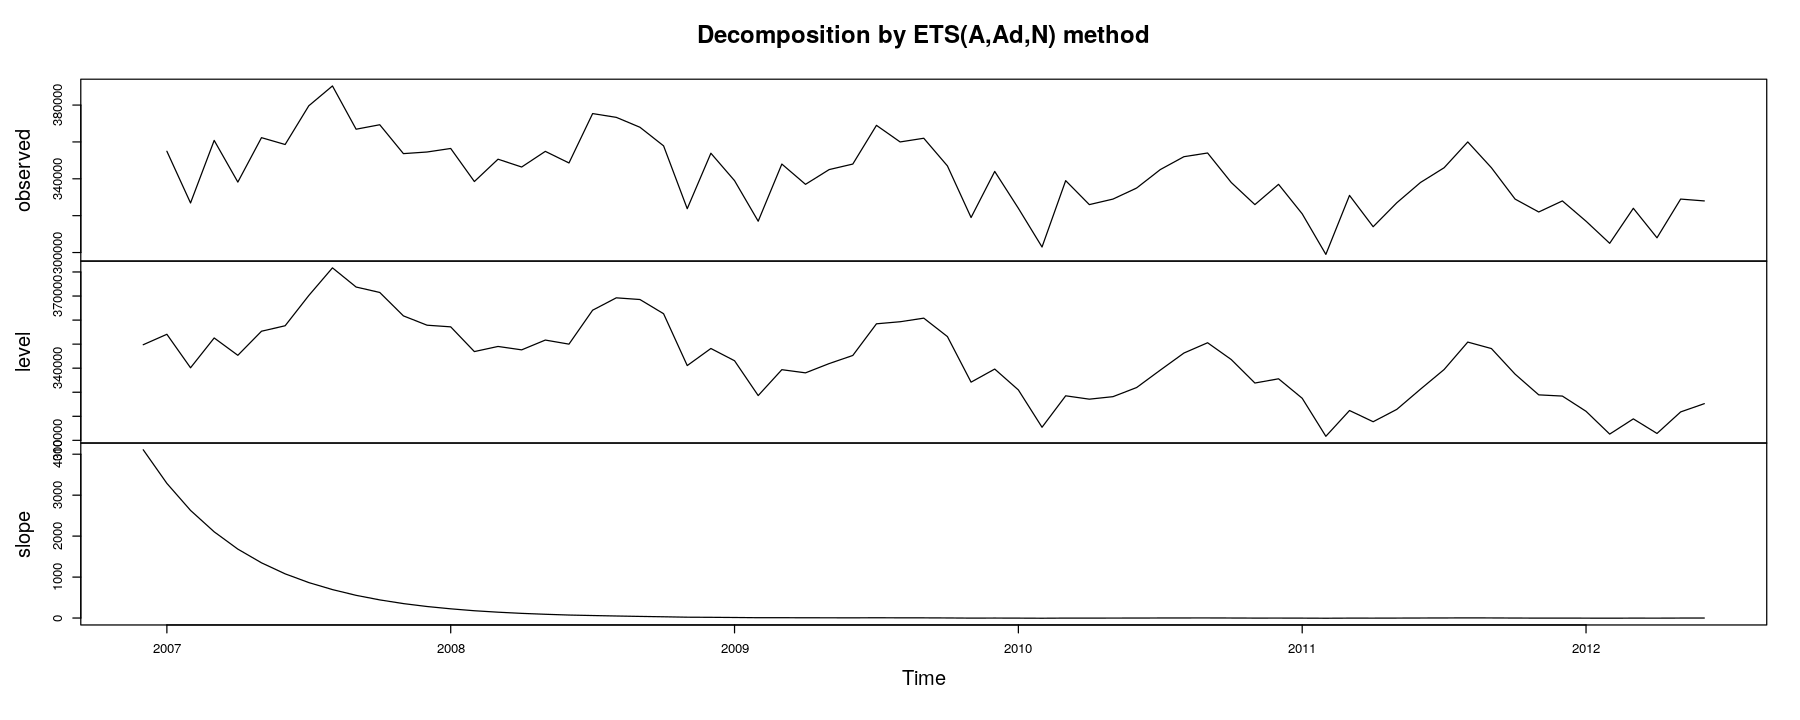

In [40]:
# plot the decomposition of fitted model
plot(Live.Births.ets.AAN)

In [41]:
# Generate an additive seasonality model
(Live.Births.ets.AAA <- ets(Live.Births.ts, model = "AAA"))

ETS(A,A,A) 

Call:
 ets(y = Live.Births.ts, model = "AAA") 

  Smoothing parameters:
    alpha = 0.1296 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 363803.3925 
    b = -557.8676 
    s = 1815.219 -13310.08 5510.557 16085.76 23364.93 18723.94
           1333.24 -1847.983 -11570.24 -899.8829 -29211.22 -9994.237

  sigma:  6437.245

     AIC     AICc      BIC 
1449.814 1462.564 1487.039 

In [42]:
# check RMSE error for the 'AAA' model
(error <- rmse.ets(Live.Births.ets.AAA))

# save RMSE error for the 'AAA' model
Live.Births.rmse = rbind(Live.Births.rmse, data.frame(RMSE = error, Model ="AAA"))
Live.Births.rmse

[1] 5602.903

RMSE,Model
<dbl>,<chr>
15551.192,AAN
5602.903,AAA


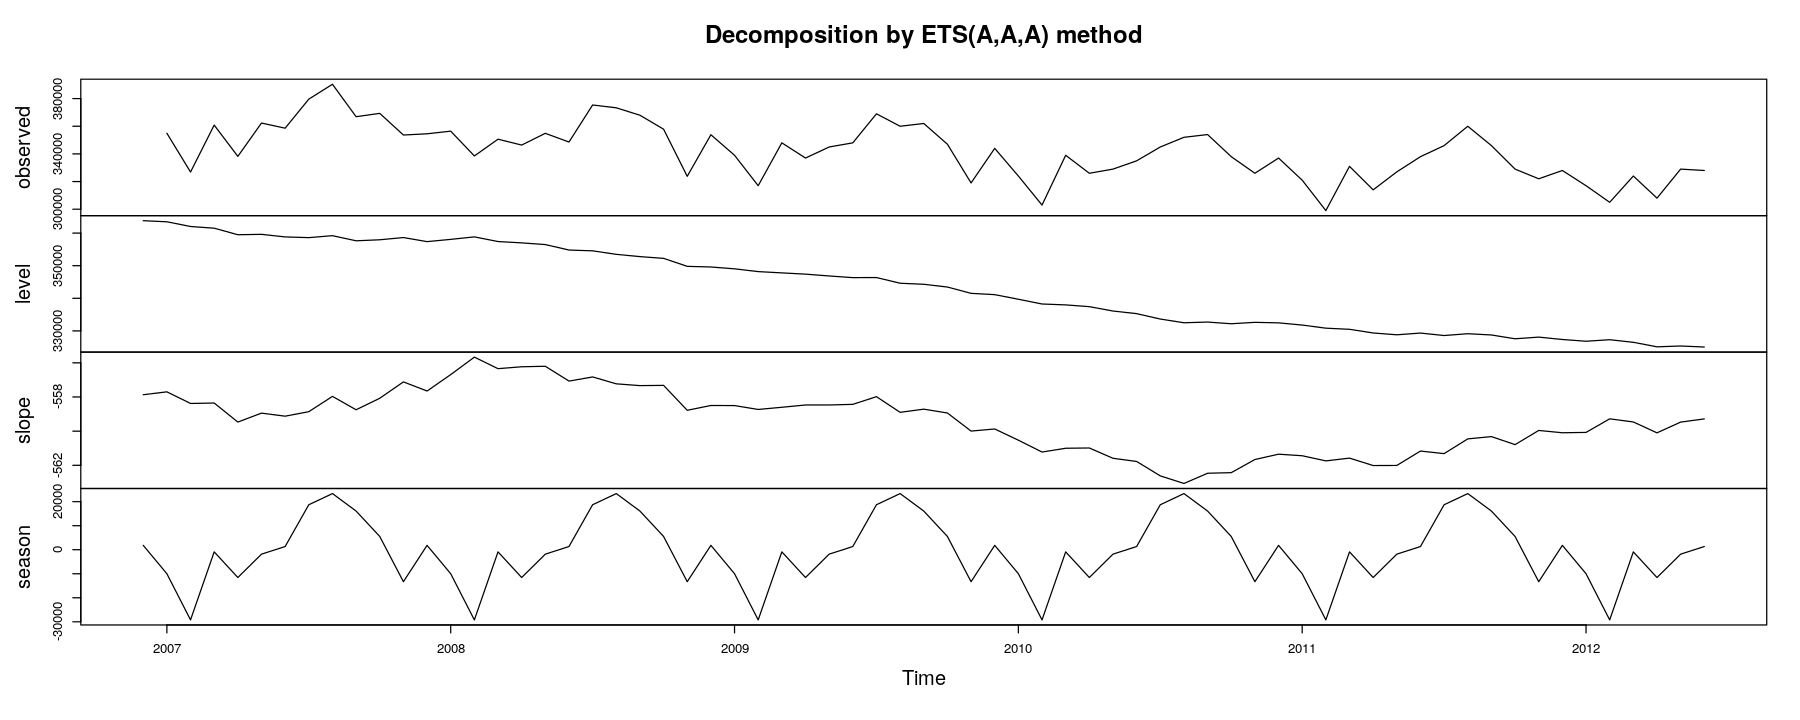

In [43]:
# plot the decomposition of fitted model
plot(Live.Births.ets.AAA)

February 2013: mean births = 291363.3 
             upper 80% confid. births = 300087.2 


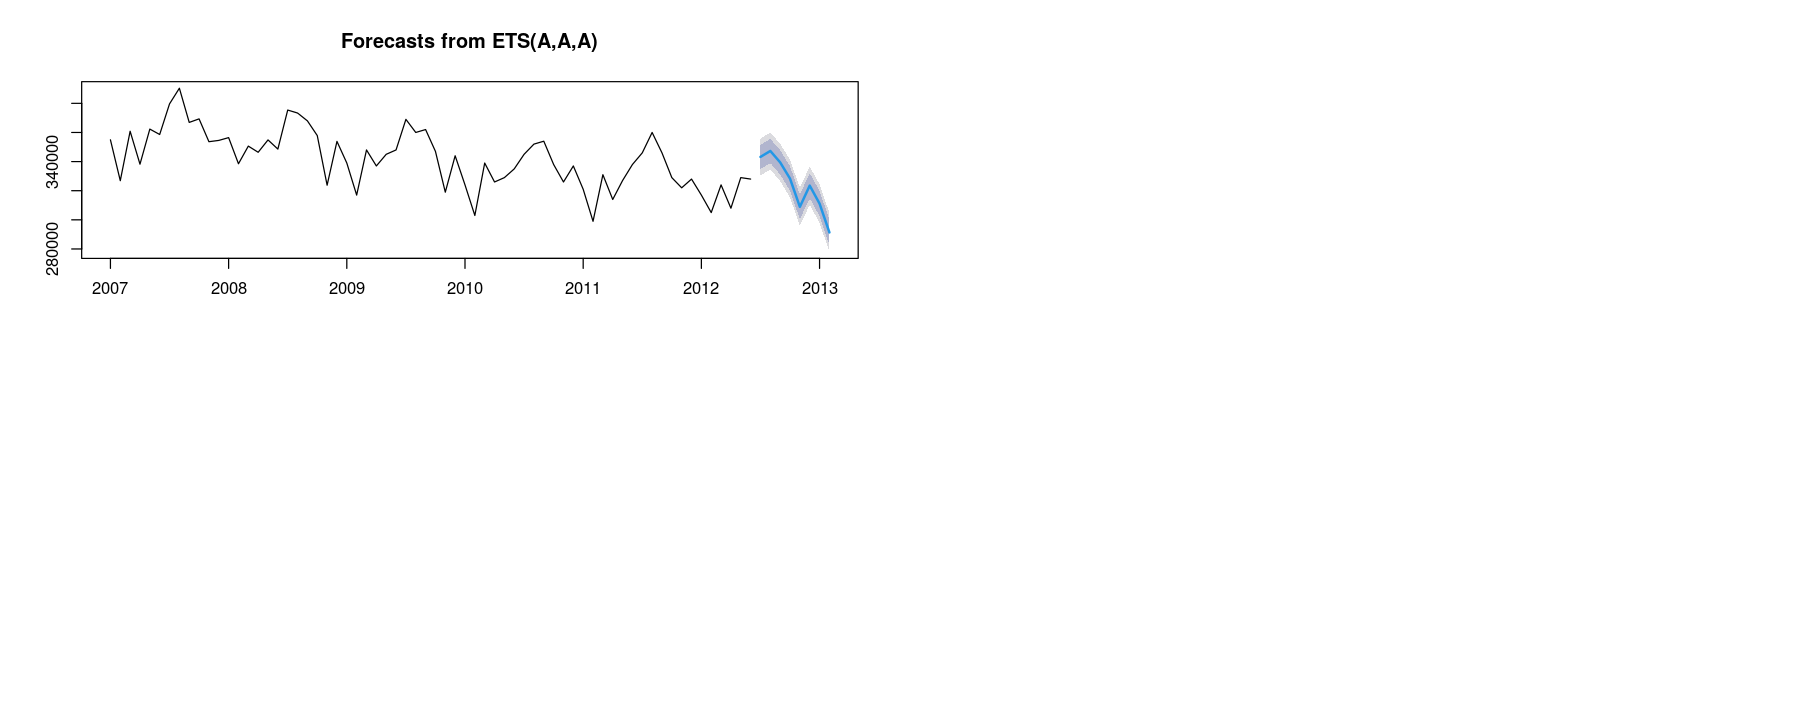

In [44]:
#forecasting AAA model to February 2013
Live.Births.ets.AAA.pred <- forecast(Live.Births.ets.AAA, h = 8)

#plot the forecast of AAA model
par(mfrow = c(2,2)) #(1,1)??
plot(Live.Births.ets.AAA.pred)


#number of US births in February 2013 with 80% confidence levels.
forecast <- forecast(Live.Births.ets.AAA, h = 8, level = c(80,95))
cat('February 2013: mean births =', round(forecast$mean[8],1),"\n")
cat('             upper 80% confid. births =', round(forecast$upper[8,1],1),"\n")

ETS(A,A,A) 

Call:
 ets(y = admits.ts, model = "AAA") 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 
    gamma = 0.0035 

  Initial states:
    l = 47.3745 
    b = -0.1384 
    s = 2.6091 -0.5402 2.4919 3.4195 -1.2297 4.7225
           1.1509 -7.124 1.5313 -3.6815 -3.2558 -0.0942

  sigma:  8.0936

     AIC     AICc      BIC 
587.0704 599.3104 624.8021 

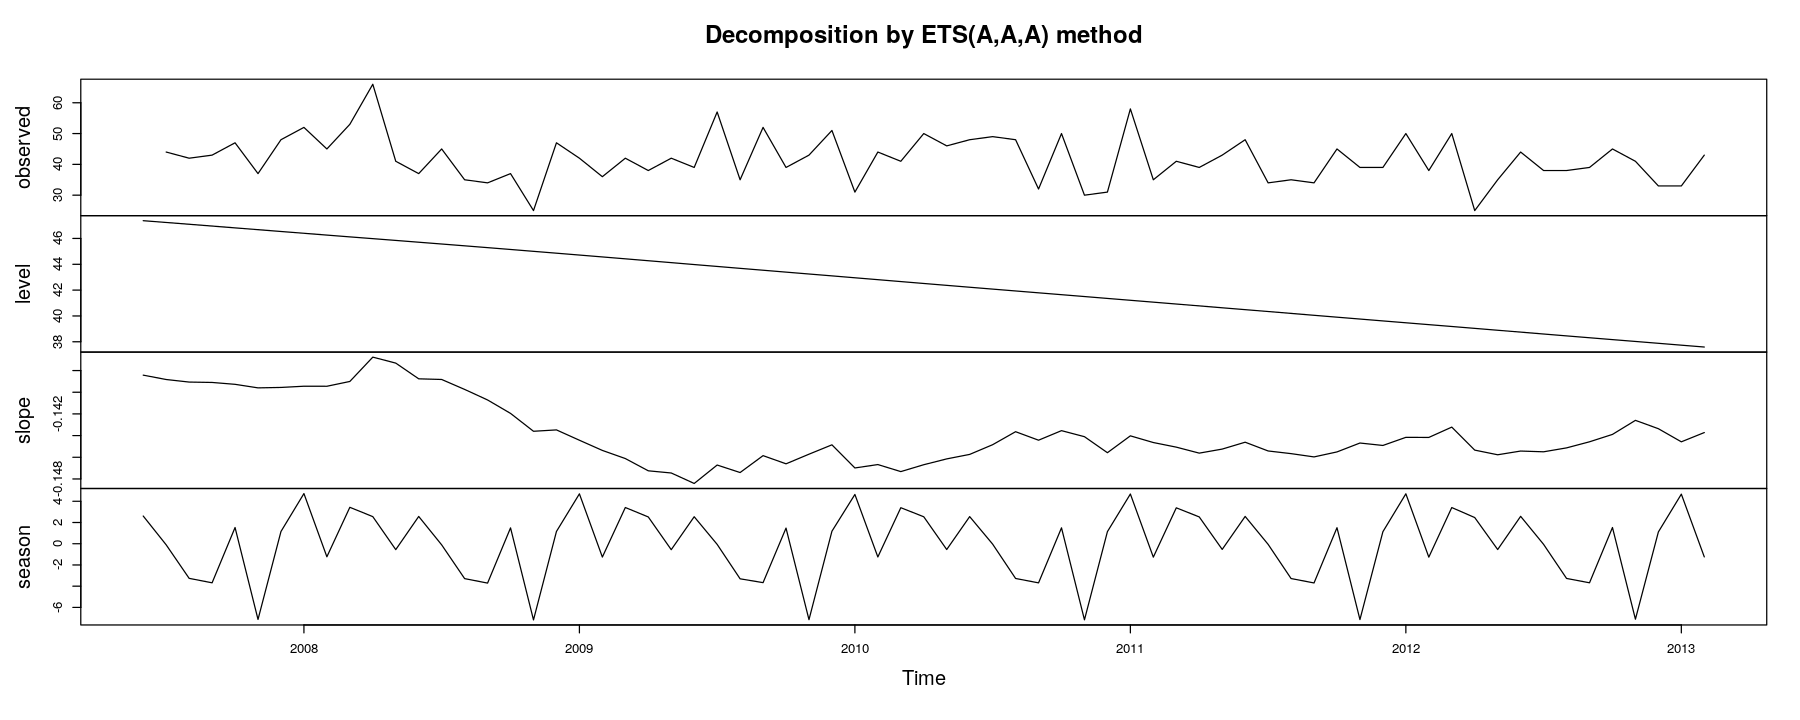

In [45]:
#load NICU dataset
NICU.df <- read.csv("NICU.csv")

#store admits data as a time series object
admits.ts <- ts(NICU.df$Admits, 
                start = c(2007, 7), 
                end = c(2013, 2), 
                freq = 12)

#plot admits of the AAA model
(admins.ets.AAA <- ets(admits.ts, model= 'AAA'))
plot(admins.ets.AAA)

Warning message in ets(alos.ts, model = "AAA"):
“Missing values encountered. Using longest contiguous portion of time series”


ETS(A,A,A) 

Call:
 ets(y = alos.ts, model = "AAA") 

  Smoothing parameters:
    alpha = 0.1011 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 36.481 
    b = -0.0741 
    s = 4.8193 4.6983 1.4197 -1.4655 -3.1442 -4.5544
           -2.6915 -2.5842 0.293 1.4556 1.6099 0.1441

  sigma:  6.8857

     AIC     AICc      BIC 
456.6756 472.7809 491.1066 

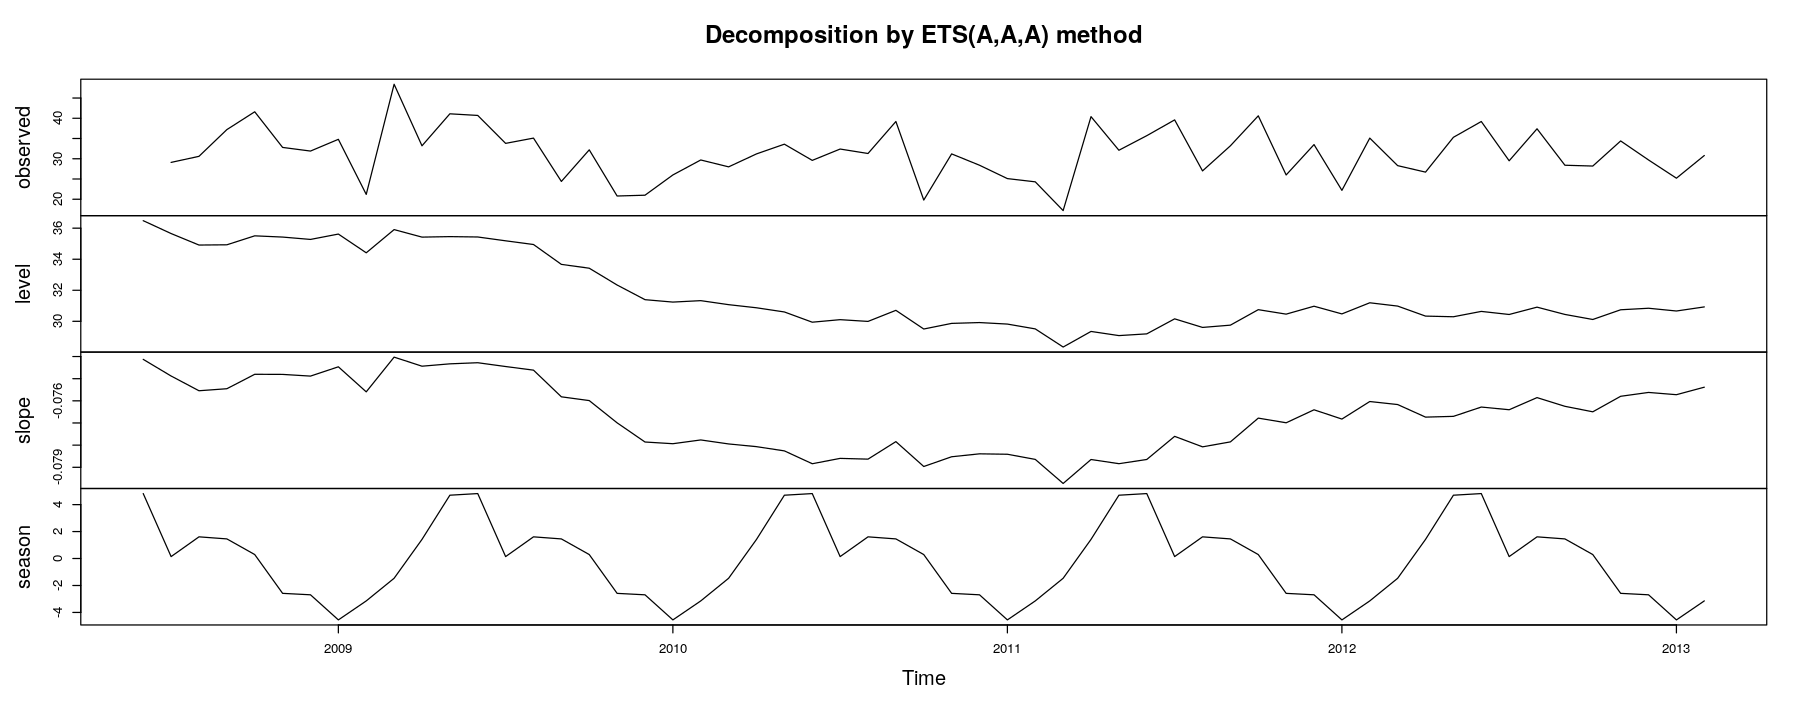

In [46]:
#store ALOS data as a time series object
alos.ts <- ts(NICU.df$ALOS, 
                 start = c(2007,7),
                 end = c(2013,2),
                 freq = 12)

#plot ALOS of the AAA Model
(alos.ets.AAA <- ets(alos.ts, model = 'AAA'))
plot(alos.ets.AAA)